<a href="https://colab.research.google.com/github/ArchitDhodi/Online-Retail-Customer-Segmentation/blob/main/Online_Retail_Customer_Segmentation_Submission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Online Retail Customer Segmentation



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual - Archit Dhodi


# **GitHub Link -**

[Github Link](https://github.com/ArchitDhodi/Online-Retail-Customer-Segmentation)

[Video Presentation Link](https://youtu.be/l6uGhToPasg)

# **Problem Statement**


**In this project, our task is to identify major customer segments on a transactional data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers. This project focuses on performing customer segmentation for an online retail business. By applying various clustering techniques to the customer data, we aim to identify distinct customer segments based on their purchasing behavior, preferences, and demographics. This segmentation analysis can provide valuable insights for targeted marketing strategies, personalized recommendations, and improved customer satisfaction.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [2]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn import metrics
import matplotlib.cm as cm
import math

### Dataset Loading

In [3]:
# Load Dataset
!gdown https://drive.google.com/uc?id=1AwNKtURY5y_ON7b3uKyVHob4MBQop3DO

Downloading...
From: https://drive.google.com/uc?id=1AwNKtURY5y_ON7b3uKyVHob4MBQop3DO
To: /content/Online Retail.xlsx - Online Retail.csv
100% 44.5M/44.5M [00:01<00:00, 26.3MB/s]


### Dataset First View

In [4]:
# Dataset First Look
df = pd.read_csv("/content/Online Retail.xlsx - Online Retail.csv")
df

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

          InvoiceDate  UnitPrice  CustomerID         Country  
0        12/1/10 8:26       2.55     17850.0  United Kingdom  
1        12/1/10 8:26       3.39     17850.0  United Kingdom  
2        12/1/10 8:26       2.75     17850.0  United Kingdom  
3        12/1/10 8:26       3.39     17850.0  United Kingdom  
4        12/1/10 8:26       3.39     17850.0  United Kingdom  
...               ...        ...         ...             ...  
541904  12/9/11 12:50       0.85     12680.0          France  
541905  12/9/11 12:50       2.10     12680.0          France  
541906  12/9/11 12:50       4.15     12680.0          France  
541907  12/9/11 12:50       4.15     12680.0          France  
541908  12/9/11 12:50       4.95     12680.0          France  

[541909 rows x 8 columns]

### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
lr = len(df.index)
lc = len(df.columns)
print("The number of rows in our dataframe is :- ", lr)
print("The number of columns in our dataframe is :- ",lc)

The number of rows in our dataframe is :-  541909
The number of columns in our dataframe is :-  8


### Dataset Information

In [6]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


#### Missing Values/Null Values

In [7]:
# Missing Values/Null Values Count
miss_value = df.isnull().sum().sort_values(ascending = False)
miss_value

CustomerID     135080
Description      1454
InvoiceNo           0
StockCode           0
Quantity            0
InvoiceDate         0
UnitPrice           0
Country             0
dtype: int64

<Axes: >

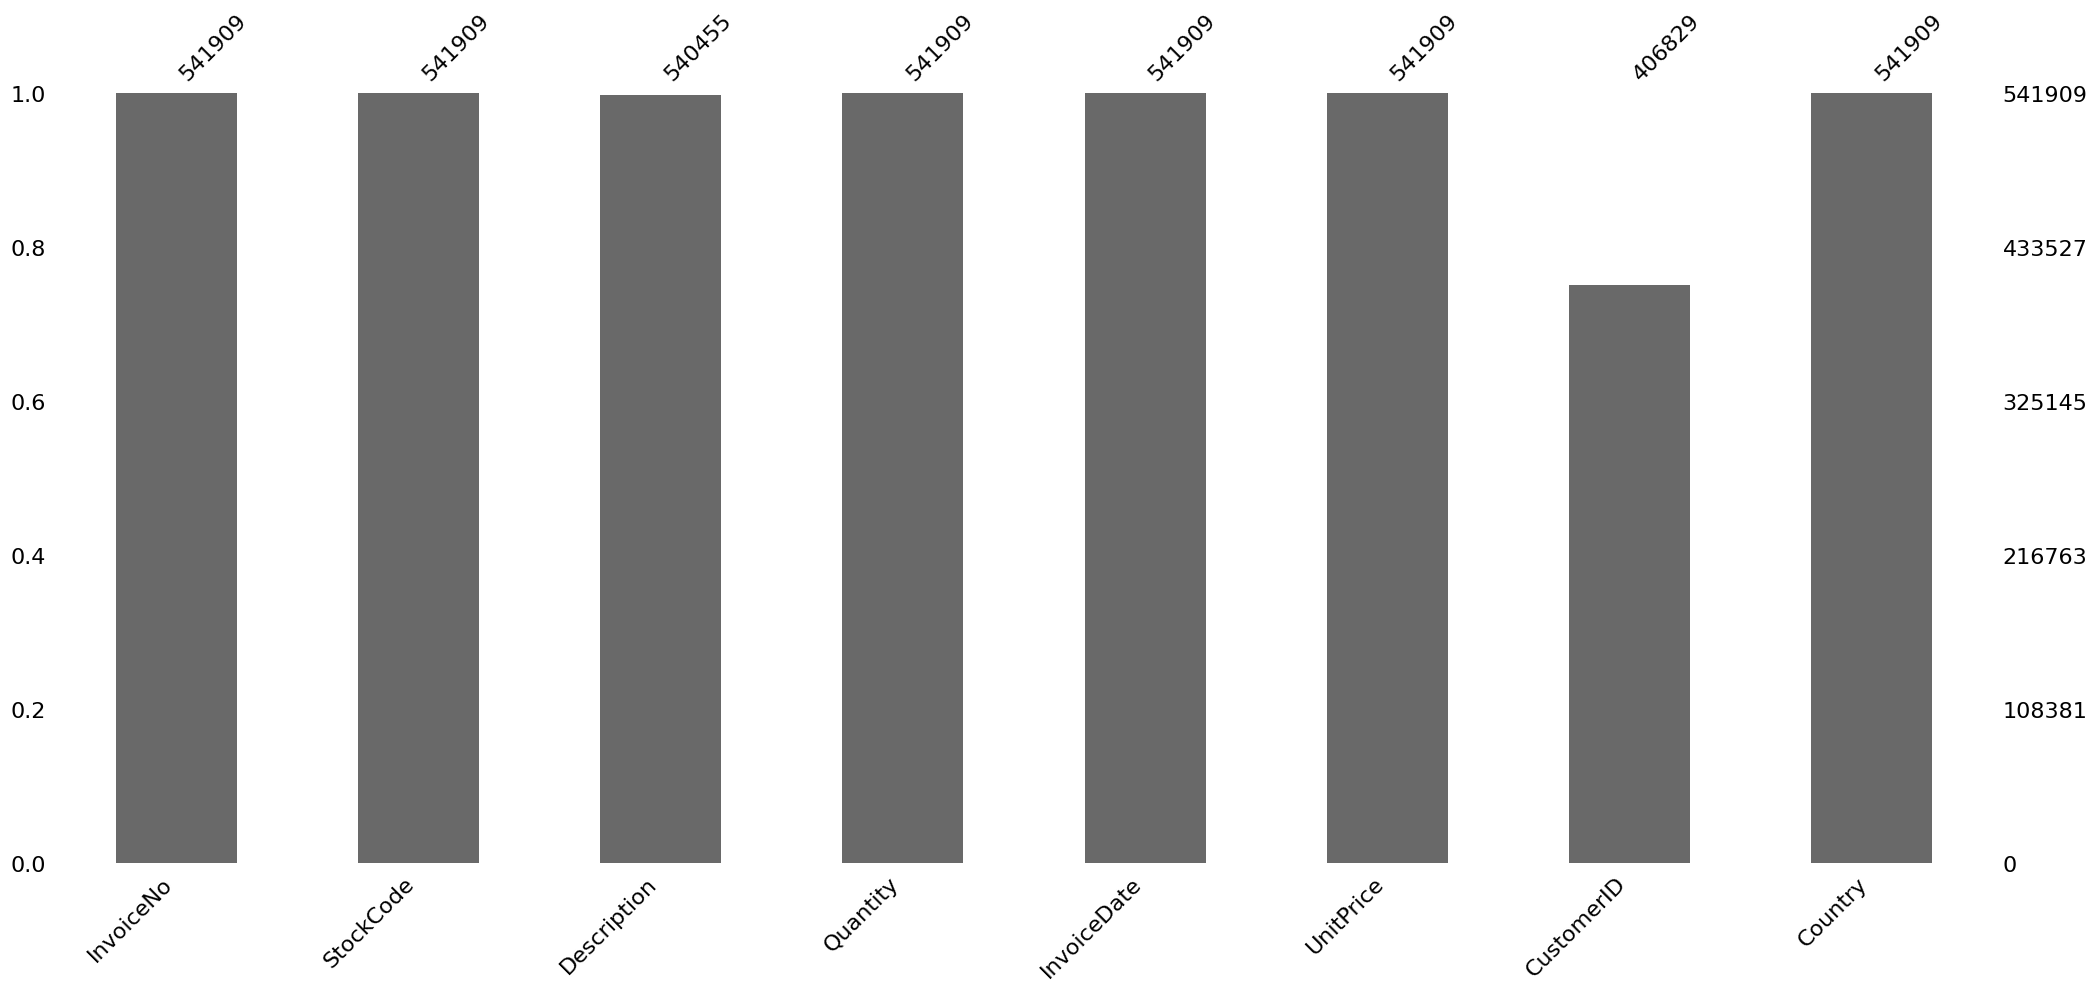

In [8]:
# Visualizing the missing values
msno.bar(df)

In [9]:
df.dropna(inplace = True)

In [10]:
df.shape

(406829, 8)

### What did you know about your dataset?

From the initial analysis, we can see that there are 541909 rows and 8 columns in our dataset. There were aroud 135080 missing values in the 'CustomerID' column and 1454 missing values in the 'Description' column which can also be seen in the visualization above. These missing values can't be replaced with any statisitical values, so we drop them from our dataframe. After dropping the missing values, the new number of rows in our dataset is 406829 and the number of columns is 8.

## ***2. Understanding Your Variables***

In [11]:
# Dataset Columns
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [12]:
# Dataset Describe
df.describe(include = "all")

InvoiceNo StockCode                         Description       Quantity  \
count     406829    406829                              406829  406829.000000   
unique     22190      3684                                3896            NaN   
top       576339    85123A  WHITE HANGING HEART T-LIGHT HOLDER            NaN   
freq         542      2077                                2070            NaN   
mean         NaN       NaN                                 NaN      12.061303   
std          NaN       NaN                                 NaN     248.693370   
min          NaN       NaN                                 NaN  -80995.000000   
25%          NaN       NaN                                 NaN       2.000000   
50%          NaN       NaN                                 NaN       5.000000   
75%          NaN       NaN                                 NaN      12.000000   
max          NaN       NaN                                 NaN   80995.000000   

           InvoiceDate      UnitPrice     CustomerID         Country  
count           406829  406829.000000  406829.000000          406829  
unique           20460            NaN            NaN              37  
top     11/14/11 15:27            NaN            NaN  United Kingdom  
freq               543            NaN            NaN          361878  
mean               NaN       3.460471   15287.690570             NaN  
std                NaN      69.315162    1713.600303             NaN  
min                NaN       0.000000   12346.000000             NaN  
25%                NaN       1.250000   13953.000000             NaN  
50%                NaN       1.950000   15152.000000             NaN  
75%                NaN       3.750000   16791.000000             NaN  
max                NaN   38970.000000   18287.000000             NaN

In [13]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

### Variables Description


*   InvoiceNo :- Invoice Number for each transaction

*   StockCode :- Coded given to each item in the stock

*   Description :- A brief description of items in the inventory

*   Quantity :- Quantity of items bought by the customer

*   InvoiceDate :- Date when the Invoice was generated

*   UnitPrice :- Price per unit of the item purchased

*   CustomerID :- Unique CustomerID given to each customer

*   Country :- Location of the customer

*   total_amt :- Total amount spent by each customer on the items

### Check Unique Values for each variable.

In [14]:
# Check Unique Values for each variable.
print(df.apply(lambda col: col.unique()))

InvoiceNo      [536365, 536366, 536367, 536368, 536369, 53637...
StockCode      [85123A, 71053, 84406B, 84029G, 84029E, 22752,...
Description    [WHITE HANGING HEART T-LIGHT HOLDER, WHITE MET...
Quantity       [6, 8, 2, 32, 3, 4, 24, 12, 48, 18, 20, 36, 80...
InvoiceDate    [12/1/10 8:26, 12/1/10 8:28, 12/1/10 8:34, 12/...
UnitPrice      [2.55, 3.39, 2.75, 7.65, 4.25, 1.85, 1.69, 2.1...
CustomerID     [17850.0, 13047.0, 12583.0, 13748.0, 15100.0, ...
Country        [United Kingdom, France, Australia, Netherland...
dtype: object


In [15]:
# Check number of Unique Values for each variable.
print(df.apply(lambda col: col.nunique()))

InvoiceNo      22190
StockCode       3684
Description     3896
Quantity         436
InvoiceDate    20460
UnitPrice        620
CustomerID      4372
Country           37
dtype: int64


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


##  **3. Data Wrangling**

### Data Wrangling Code

In [17]:
# Write your code to make your dataset analysis ready.
df["InvoiceNo"].sort_values(ascending=True)

0          536365
1          536365
2          536365
3          536365
4          536365
           ...   
540448    C581490
541541    C581499
541715    C581568
541717    C581569
541716    C581569
Name: InvoiceNo, Length: 406829, dtype: object

In [18]:
# Changing the datatype of InvoiceNo column from object to integer(int64) datatype
# and CustomerID column from float(float64) to integer(int64) datatype
df["InvoiceNo"] = df["InvoiceNo"].astype("str")
df["CustomerID"] = df["CustomerID"].astype("int64")

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  int64  
 7   Country      406829 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 27.9+ MB


In [20]:
# Checking if there are negative values of "Quantity" entered in our dataframe
df[df["Quantity"]<0].count()

InvoiceNo      8905
StockCode      8905
Description    8905
Quantity       8905
InvoiceDate    8905
UnitPrice      8905
CustomerID     8905
Country        8905
dtype: int64

In [21]:
# Checking if there are negative quantities of "UnitPrice" column in our dataframe
df[df["UnitPrice"]<=0].head()

InvoiceNo StockCode                   Description  Quantity  \
9302     537197     22841  ROUND CAKE TIN VINTAGE GREEN         1   
33576    539263     22580  ADVENT CALENDAR GINGHAM SACK         4   
40089    539722     22423      REGENCY CAKESTAND 3 TIER        10   
47068    540372     22090       PAPER BUNTING RETROSPOT        24   
47070    540372     22553        PLASTERS IN TIN SKULLS        24   

          InvoiceDate  UnitPrice  CustomerID         Country  
9302    12/5/10 14:02        0.0       12647         Germany  
33576  12/16/10 14:36        0.0       16560  United Kingdom  
40089  12/21/10 13:45        0.0       14911            EIRE  
47068    1/6/11 16:41        0.0       13081  United Kingdom  
47070    1/6/11 16:41        0.0       13081  United Kingdom

In [22]:
# This removes the cancellation orders in the dataframe becasue that wont help
# us in segmentation of customers.
df = df[~df['InvoiceNo'].str.contains('C')]

# Removing the negative values of Quantity and UnitPrice columns because
# these values can't be negative.
df = df[df['Quantity'] >= 0]
df = df[df['UnitPrice'] != 0]

In [ ]:
df.shape

(397884, 8)

In [ ]:
# Converting the datatype of "InvoiceDate" column from Object to String format
df["InvoiceDate"]=df["InvoiceDate"].astype("str")

In [ ]:
# Converting the datatype of "InvoiceDate" column from String to Datetime format
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"], format="%m/%d/%y %H:%M")

In [ ]:
# Extracting the year, month number, day number, hour, minute and weekday name
df["year"] = df["InvoiceDate"].apply(lambda x: x.year)
df["month_num"] = df["InvoiceDate"].apply(lambda x: x.month)
df["day_num"] = df["InvoiceDate"].apply(lambda x: x.day)
df["hour"] = df["InvoiceDate"].apply(lambda x: x.hour)
df["week"]=df["InvoiceDate"].dt.day_name()

In [ ]:
# Ensuring the columns have been created
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'year', 'month_num', 'day_num',
       'hour', 'week'],
      dtype='object')

In [ ]:
# Having a look at the dataframe with new columns that we created
df.head(10)

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
5    536365     22752         SET 7 BABUSHKA NESTING BOXES         2   
6    536365     21730    GLASS STAR FROSTED T-LIGHT HOLDER         6   
7    536366     22633               HAND WARMER UNION JACK         6   
8    536366     22632            HAND WARMER RED POLKA DOT         6   
9    536367     84879        ASSORTED COLOUR BIRD ORNAMENT        32   

          InvoiceDate  UnitPrice  CustomerID         Country  year  month_num  \
0 2010-12-01 08:26:00       2.55       17850  United Kingdom  2010         12   
1 2010-12-01 08:26:00       3.39       17850  United Kingdom  2010         12   
2 2010-12-01 08:26:00       2.75       17850  United Kingdom  2010         12   
3 2010-12-01 08:26:00       3.39       17850  United Kingdom  2010         12   
4 2010-12-01 08:26:00       3.39       17850  United Kingdom  2010         12   
5 2010-12-01 08:26:00       7.65       17850  United Kingdom  2010         12   
6 2010-12-01 08:26:00       4.25       17850  United Kingdom  2010         12   
7 2010-12-01 08:28:00       1.85       17850  United Kingdom  2010         12   
8 2010-12-01 08:28:00       1.85       17850  United Kingdom  2010         12   
9 2010-12-01 08:34:00       1.69       13047  United Kingdom  2010         12   

   day_num  hour       week  
0        1     8  Wednesday  
1        1     8  Wednesday  
2        1     8  Wednesday  
3        1     8  Wednesday  
4        1     8  Wednesday  
5        1     8  Wednesday  
6        1     8  Wednesday  
7        1     8  Wednesday  
8        1     8  Wednesday  
9        1     8  Wednesday

In [ ]:
# Creating a new column "total_amt" by multiplying "Quantity" by "UnitPrice"
df["total_amt"] = df["Quantity"]*df["UnitPrice"]
df["total_amt"]

0         15.30
1         20.34
2         22.00
3         20.34
4         20.34
          ...  
541904    10.20
541905    12.60
541906    16.60
541907    16.60
541908    14.85
Name: total_amt, Length: 397884, dtype: float64

### What all manipulations have you done and insights you found?


*   We converted the datatype of the "InvoiceNo" column from object to string(str) datatype.

*   We converted the datatype of the "CustomerID" column from object to integer(int64) datatype.

*   We removed the Cancelled orders from the "InvoiceNo" column.

*   We removed the entries from the dataframe where the "UnitPrice" <= 0.

*   We converted the "InvoiceDate" column from object to string (str) datatype.

*   To extract and create new columns "year", "month_num", "day_num", "hour", and "week", we convert "InvoiceDate" column to DateTime format.

*   We create a new column "total_amt" by multiplying "Quantity" and "UnitPrice" columns.


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

In [ ]:
# To plot a simple bar chart with values ordered.
def plot_bar_chart(df, x, y, order, t1):
  fig, ax = plt.subplots(figsize=(20,5))
  sns.barplot(data=df, x=x, y=y, ax=ax, order = order)
  plt.title(t1)
  plt.xlabel(x)
  plt.ylabel(y)
  for label in ax.containers:
    ax.bar_label(label)


# To plot a simple countplot displaying the top 10 values for a category.
def plot_count_plot(df, x, t1):
  fig, ax = plt.subplots(figsize=(20,5))
  sns.countplot(data=df, x=x, ax=ax, order = df[x].value_counts().iloc[:10].index)
  plt.title(t1)
  plt.xlabel(x)
  for label in ax.containers:
    ax.bar_label(label)


# To plot a countplot with the hue parameter which is used to vizualized the data
# of different categories in one plot.
def plot_count_plot_hue(df, x, y, t1):
  fig, ax = plt.subplots(figsize=(22,6))
  sns.countplot(data=df, x=x, ax=ax, hue = y, order = df[x].value_counts().iloc[:10].index)
  plt.title(t1)
  plt.xlabel(x)
  for label in ax.containers:
    ax.bar_label(label)


# To plot a horizontal count plot. This is used when the label names of the x-axis
# are very long and we want to see them clearly without any overlap.
def plot_count_hori(df,x,t1):
  fig, ax = plt.subplots(figsize=(20,10))
  sns.countplot(data=df, y=x, ax=ax, order = df[x].value_counts().iloc[:10].index)
  plt.title(t1)
  plt.xlabel(x)
  for label in ax.containers:
    ax.bar_label(label)


# To plot a bar chart displaying the bottom 10 values of a category.
def plot_bar_chart_bottom(df, x, y, t1):
  fig, ax = plt.subplots(figsize=(22,6))
  sns.barplot(data=df, x=x, y=y, ax=ax, order = df[x].value_counts().iloc[-11:].index)
  plt.title(t1)
  plt.xlabel(x)
  plt.ylabel(y)
  for label in ax.containers:
    ax.bar_label(label)


# To plot a simple count plot displaying the bottom 10 values of a category.
def plot_count_plot_bottom(df, x, t1):
  fig, ax = plt.subplots(figsize=(20,10))
  sns.countplot(data=df, x=x, ax=ax, order = df[x].value_counts().iloc[-11:].index)
  plt.title(t1)
  plt.xlabel(x)
  for label in ax.containers:
    ax.bar_label(label)


# To plot a simple horizontal bar chart displaying the bottom 10 values of a category.
# This is used when the label names of the x-axis are very long and we want to
# see the names clearly without any overlap.
def plot_count_hori_bottom(df, x, t1):
  fig, ax = plt.subplots(figsize=(22,6))
  sns.countplot(data=df, y=x, ax=ax, order = df[x].value_counts().iloc[-11:].index)
  plt.title(t1)
  plt.xlabel(x)
  for label in ax.containers:
    ax.bar_label(label)


# To count the number of instances of a column label in a column and storing the
# values in a dataframe.
def get_count_from_column(df, column_label):
  df_grpd = df[column_label].value_counts()
  df_grpd = pd.DataFrame({'index':df_grpd.index, 'count':df_grpd.values})
  return df_grpd


# To plot a simple pie chart
def plot_pie_chart_from_column(df, column_label, t1):
  df_grpd = get_count_from_column(df, column_label)
  fig, ax = plt.subplots(figsize=(10,5))
  ax.pie(df_grpd.loc[:, 'count'], labels=df_grpd.loc[:, 'index'], autopct='%1.2f%%',startangle=90)
  plt.title(t1, bbox={'facecolor':'0.8', 'pad':3})
  ax.axis('equal')
  plt.legend()
  plt.show()

### Chart - 1

In [ ]:
# To clearly see the names of the top 10 items.
n = 10
df['Description'].value_counts()[:n].index.tolist()

['WHITE HANGING HEART T-LIGHT HOLDER',
 'REGENCY CAKESTAND 3 TIER',
 'JUMBO BAG RED RETROSPOT',
 'ASSORTED COLOUR BIRD ORNAMENT',
 'PARTY BUNTING',
 'LUNCH BAG RED RETROSPOT',
 'SET OF 3 CAKE TINS PANTRY DESIGN ',
 'LUNCH BAG  BLACK SKULL.',
 'POSTAGE',
 'PACK OF 72 RETROSPOT CAKE CASES']

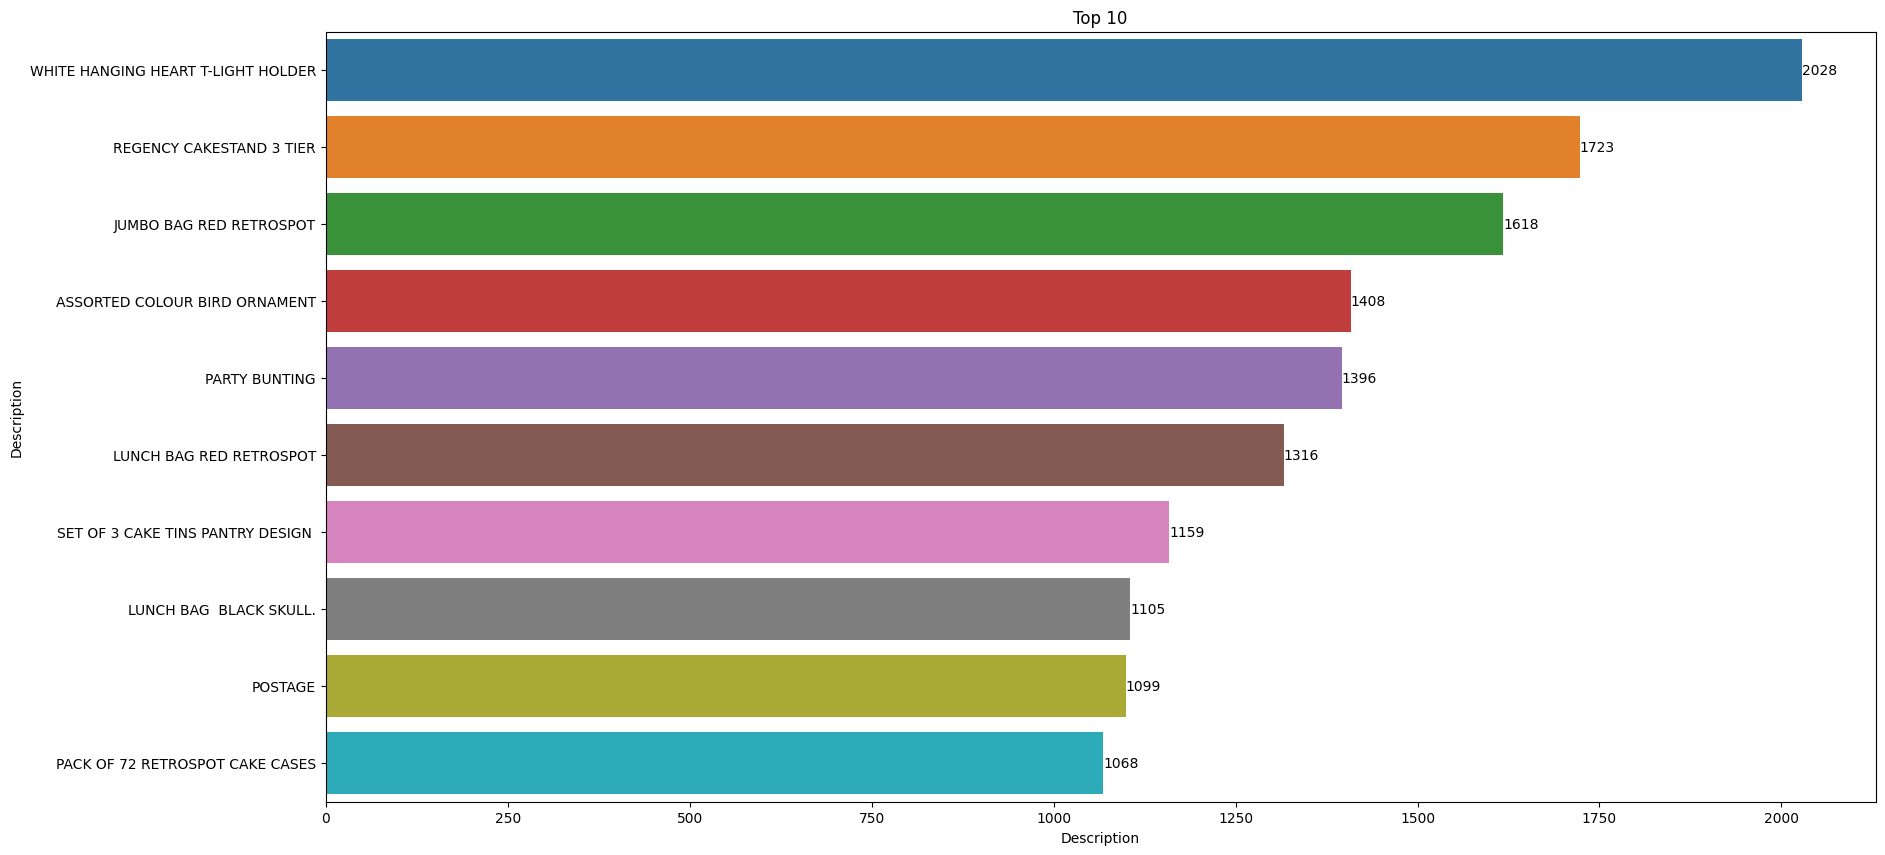

In [ ]:
# Chart - 1 visualization code
plot_count_hori(df, "Description", "Top 10")

#### 1. Why did you pick the specific chart?

We are using Seaborn's Countplot because it is used to count the number of occurences of observations in the respective categorical variables.

#### 2. What is/are the insight(s) found from the chart?

From the above visualization, we can see that 'WHITE HANGING HEART T-LIGHT HOLDER' was the item which was bought in most of the transactions by the people, followed by 'REGENCY CAKESTAND 3 TIER', 'JUMBO BAG RED RETROSPOT' & 'ASSORTED COLOUR BIRD ORNAMENT'.

#### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

On the basis of the insights gained from the above chart, we can suggest the store to keep excess inventory of these items so that if the demand gets high, their stock doesn't run out. During festive season, the store can even put some discounts, so that more customers get attracted, thus increasing the revenue.

### Chart - 2

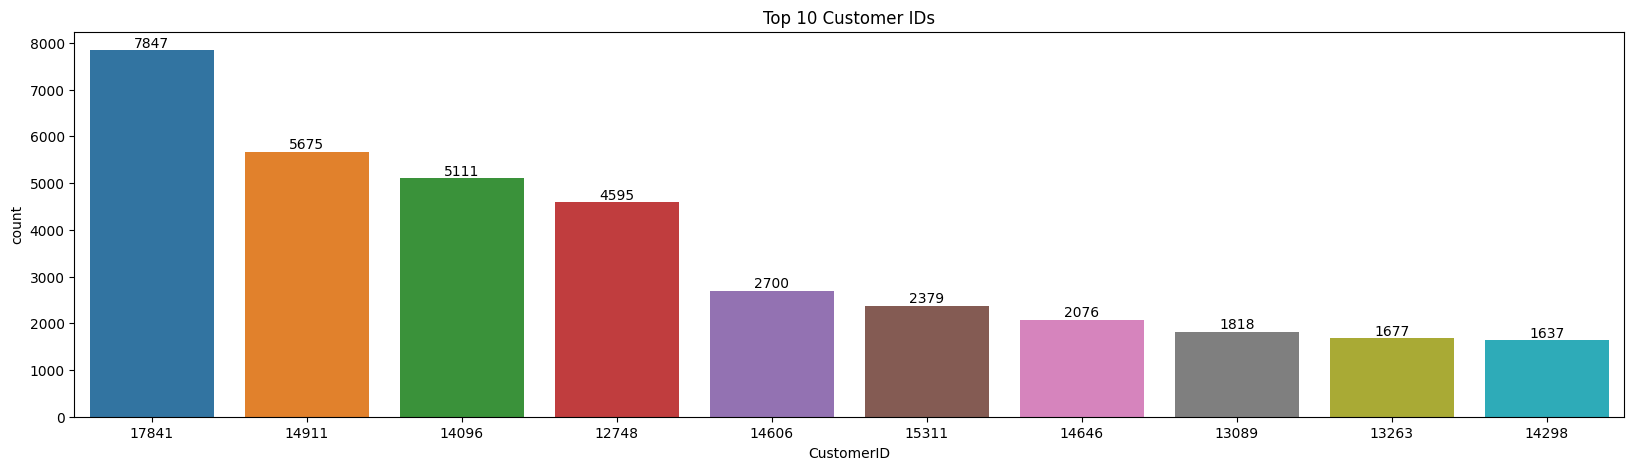

In [ ]:
# Chart - 2 visualization code
plot_count_plot(df, "CustomerID", "Top 10 Customer IDs")

#### 1. Why did you pick the specific chart?

We are using Seaborn's Countplot because it is used to count the number of occurences of observations in the respective categorical variables.

#### 2. What is/are the insight(s) found from the chart?

The above visualization shows the top 10 customers based on the number of transactions they have made at the store.

### Chart - 3

In [ ]:
# Chart - 3 visualization code

# Using groupby to group the total amount spent by a particular customer with their CustomerID.
df_total = df.groupby('CustomerID')['total_amt'].sum().reset_index()
total_amount_sorted = df_total.sort_values(by='total_amt', ascending=False).head(10)
total_amount_sorted

CustomerID  total_amt
1689       14646  280206.02
4201       18102  259657.30
3728       17450  194550.79
3008       16446  168472.50
1879       14911  143825.06
55         12415  124914.53
1333       14156  117379.63
3771       17511   91062.38
2702       16029   81024.84
0          12346   77183.60

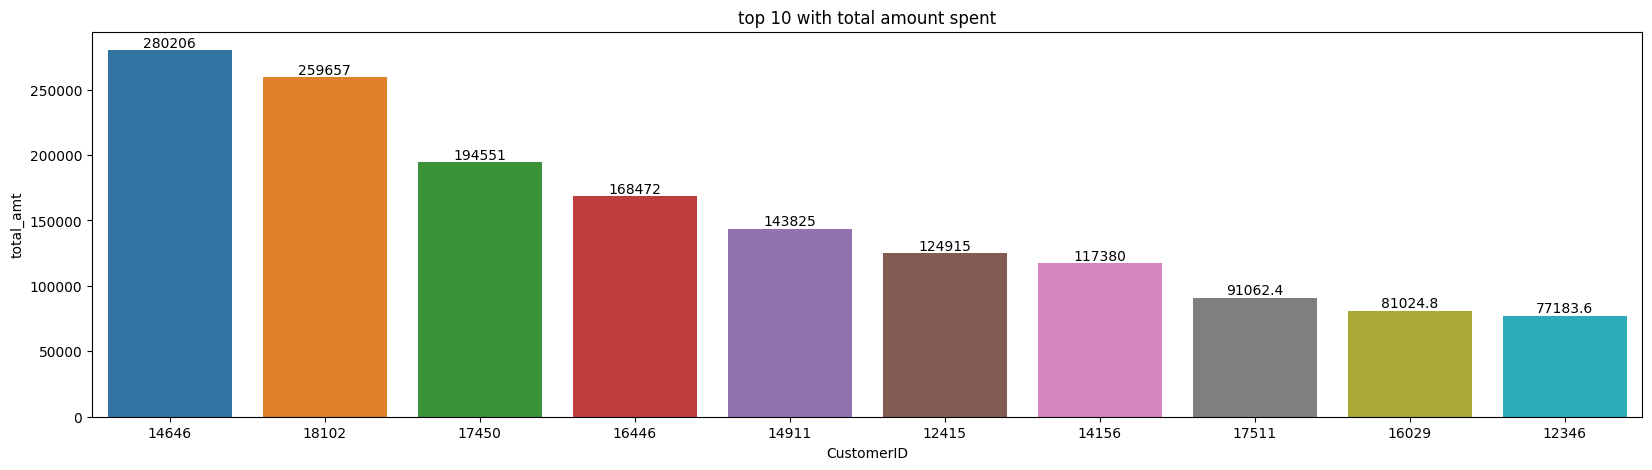

In [ ]:
plot_bar_chart(df_total, "CustomerID", "total_amt", total_amount_sorted['CustomerID'],"top 10 with total amount spent")

#### 1. Why did you pick the specific chart?

A bar chart is used when we want to show a distribution of data points or perform a comparison of metric values across different subgroups of your data.

#### 2. What is/are the insight(s) found from the chart?

The above visualization shows the top 10 customers based on the average amount of money they have spent on each tracnsaction at the store.

#### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Since these are the top 10 customers based on the average amount of money they spent on transactions in the store. We can suggest the store to take a threshold and teh customers above that threshold can be asked to become a member of the store. This will help retain these customers and they, in turn can get accumulate points and get discounts on the items as per the store's suggestion.

### Chart - 4

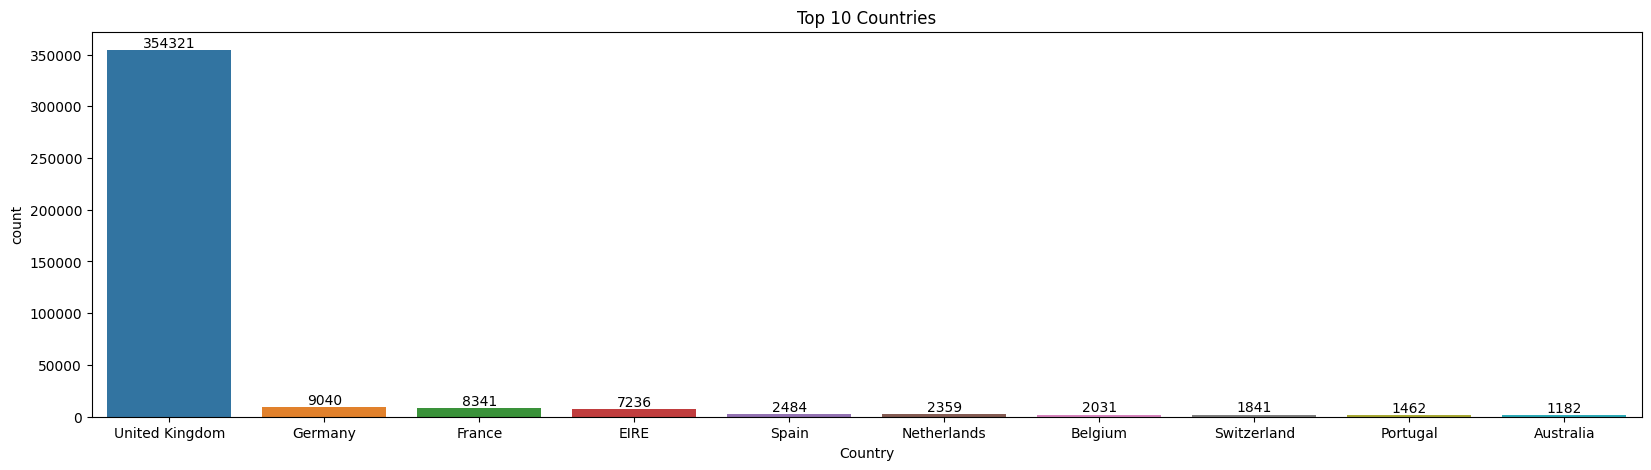

In [ ]:
# Chart - 4 visualization code
plot_count_plot(df,"Country","Top 10 Countries")

#### 1. Why did you pick the specific chart?

We are using Seaborn's Countplot because it is used to count the number of occurences of observations in the respective categorical variables.

#### 2. What is/are the insight(s) found from the chart?

As we can see, most number of customers are from the United Kingdom, followed by Germany and France.

#### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

We can see that most of the customers are from the UnitedKingdom followed by other countries. To improve the number of customers belonging to other nations, we can suggest the store to add a section where local delights and foods from some of the above countries are there. This will help the store because customers belonging to other nations can enjoy their local delicacies and spread the word to other people as well. We can also suggest the store to hire multilingual staff so that there is nor language barrier between the customers and the store employees.

### Chart - 5

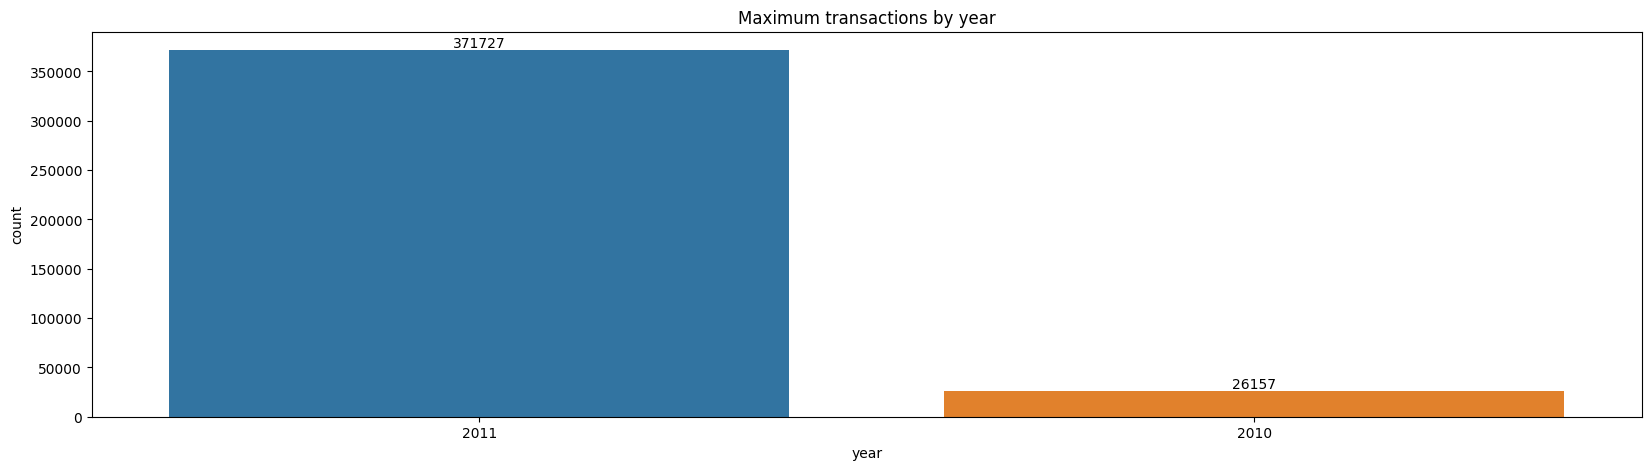

In [ ]:
# Chart - 5 visualization code
plot_count_plot(df, "year","Maximum transactions by year")

#### 1. Why did you pick the specific chart?

We are using Seaborn's Countplot because it is used to count the number of occurences of observations in the respective categorical variables.

#### 2. What is/are the insight(s) found from the chart?

We have been given data of 371727 transactions from the year 2011 and 26157 transactions from December 1 - December 31st 2010.

### Chart - 6

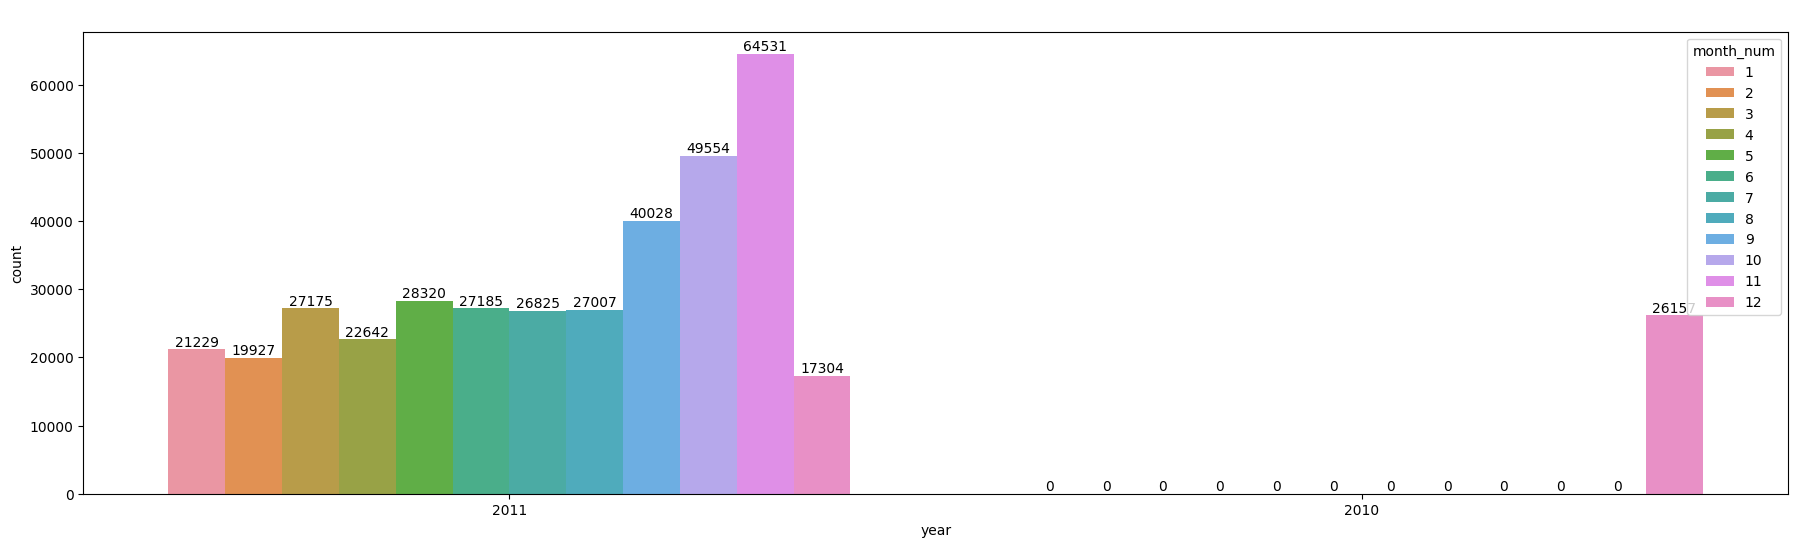

In [ ]:
# Chart - 6 visualization code
plot_count_plot_hue(df,"year","month_num"," ")

#### 1. Why did you pick the specific chart?

We are using Seaborn's Countplot because it is used to count the number of occurences of observations in the respective categorical variables. We use the parameter 'hue' because we wanted to see the number of transactions for each month of the year.

#### 2. What is/are the insight(s) found from the chart?

We dont have complete data for the month of December. So, leaving it aside, we can see that the maximum number of transactions occured in the month of November, followed by October and September. The large number of transactions in the months of October and then in November can be owed to the number of festivals and celebrations in these months continuing till the first week of December.

#### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

We can see that since the maximum number of transactions occur during the months of October, November and December, the store should offer some sort of discounts in rest of the months, which will attract more customers and hence increase the number of transactions.

### Chart - 7

In [ ]:
# To display the hours at which transactions were done at the superstore.
df["hour"].unique()

array([ 8,  9, 10, 11, 12, 13, 14, 15, 16, 17,  7, 18, 19, 20,  6])

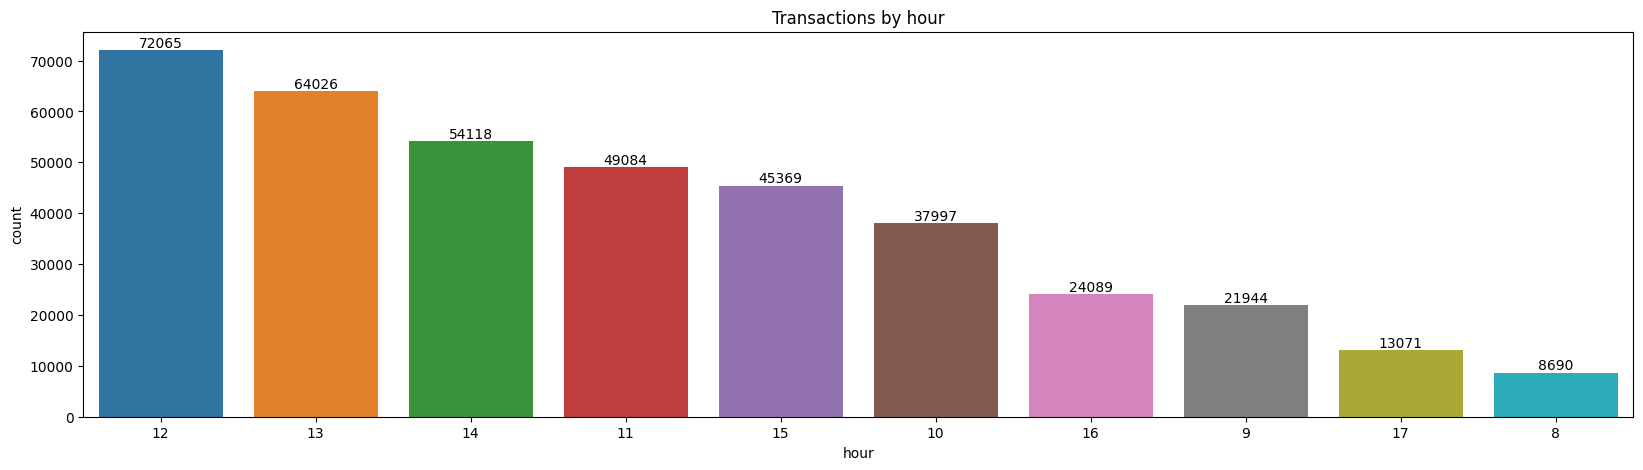

In [ ]:
# Chart - 7 visualization code
plot_count_plot(df,"hour","Transactions by hour")

#### 1. Why did you pick the specific chart?

We are using Seaborn's Countplot because it is used to count the number of occurences of observations in the respective categorical variables.

#### 2. What is/are the insight(s) found from the chart?

From the above countplot, we can infer that maximum of the transactions occur during the afternoon period of 12pm-3pm followed by the morning period of 9am-12pm. This means that most of the people like visiting the store and doing transactions during the morning and afternoon time as compared to evening and late evening

#### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

To increase the footfall during morning hours, we can suggest the store to have something like Breakfast Specials, wehre the store can partner with a local bakery and offer coffee and breakfast essentials at a discount. The store can also start an initiative where they can start a loyalty program especially for working professionals who can visit the store only after their work hours. This will incentivize the working professionals to visit the stores after their work hours as they will be accumulating more points which can be redeemed as discounts in the future.

### Chart - 8

In [ ]:
# Using groupby to group the average amount spent by each customer with their CustomerID.
avg = df.groupby('CustomerID')['total_amt'].mean().reset_index().rename(columns={'total_amt':'avg_amt'}).sort_values('avg_amt',ascending=False)
avg_amount = avg.head(10)
avg_amount['avg_amt'] = avg_amount['avg_amt'].apply(lambda x : round(x,2))
avg_amount_sorted = avg_amount.sort_values(by='avg_amt', ascending=False)

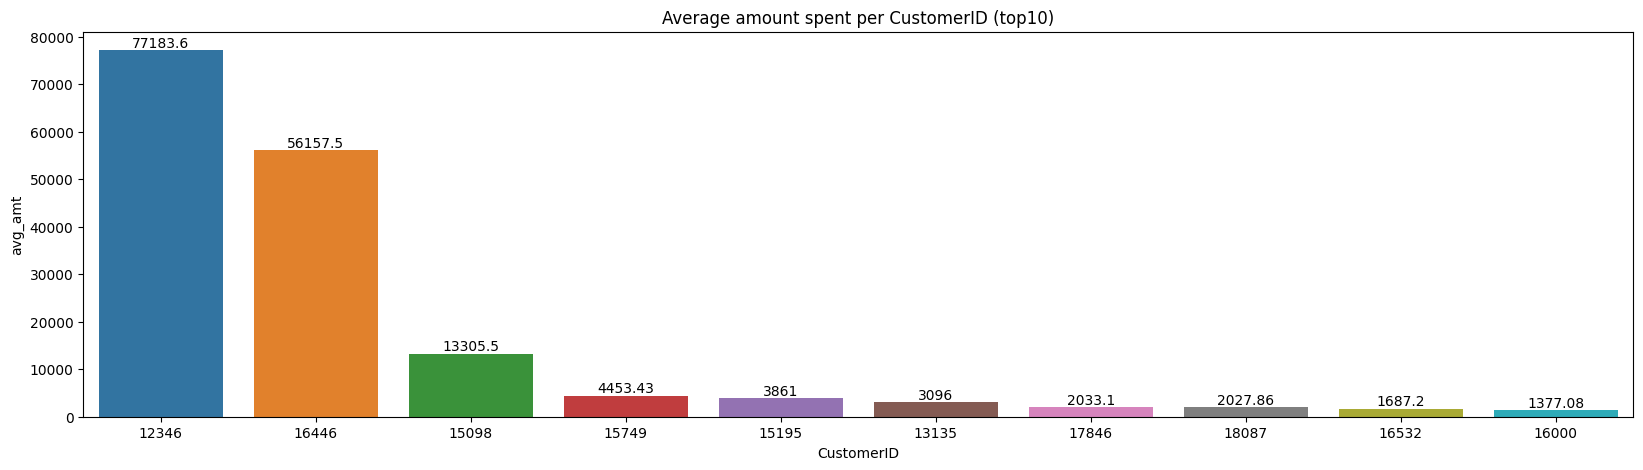

In [ ]:
plot_bar_chart(avg_amount, 'CustomerID', 'avg_amt', avg_amount_sorted['CustomerID'], 'Average amount spent per CustomerID (top10)')

#### 1. Why did you pick the specific chart?

A bar chart is used when we want to show a distribution of data points or perform a comparison of metric values across different subgroups of your data.

#### 2. What is/are the insight(s) found from the chart?

The above Bar Chart shows us the top 10 customers with the maximum number of average amount spent with the store.

#### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

From the above bar chart we can see that the customers with id 12346 and 16446 have unusually high amount of money spent on average in the store which indicates that these customers might be some other stores who are sourcing the items from this store. We suggest the store to offer competitive and transparent pricing to these stores. This is because small stores have tight profit margins and offering fair pricing will help retain the small stores and even encourage them to source more items from the store. We can also incentivize these stores by offering them discounts if they are ready to source their items from the store for the long run.

### Chart - 9

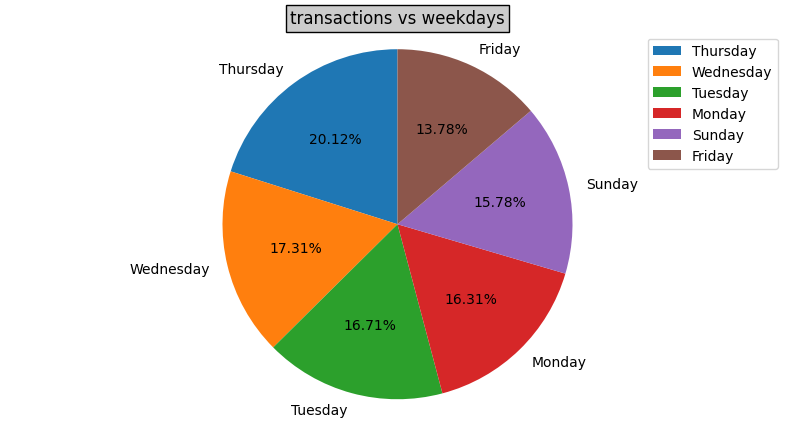

Thursday     80035
Wednesday    68885
Tuesday      66473
Monday       64893
Sunday       62773
Friday       54825
Name: week, dtype: int64

In [ ]:
# Chart - 9 visualization code
plot_pie_chart_from_column(df, 'week', "transactions vs weekdays")
print("\n")

# To display the exact number of transactions for each day of the week
df['week'].value_counts()

#### 1. Why did you pick the specific chart?

We chose a Pie chart because we wanted to represent the percentage of transactions done for each day of the week

#### 2. What is/are the insight(s) found from the chart?

From the above Pie chart, we can see that the store remains closed on Saturday. The maximum number of transactions occured on Thursday, the lowest on Friday and linearly decreasing number of transactions for the rest of the days.

#### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

We can see most of the transactions took place on Thursday, so on Thursday, we can suggest the store to ask the store to introduce special discounts or promotions that are exclusive to Thursdays, like special discounts on some top-selling famous items. On other days, especially Friday and Sunday, we can recommend the store to introduce Bundled deals, that offer a combination of itmes at a discounted price, increasing the average transaction value. The company can offer special member rates on Fridays and Sundays, incentivizing the members to shop on those days, thus increasing the footfall and transactions at the store. We also recommend the store to extend the store hours on Fridays and Sundays, which will help them cater to a larger audience on those days.

### Chart - 10

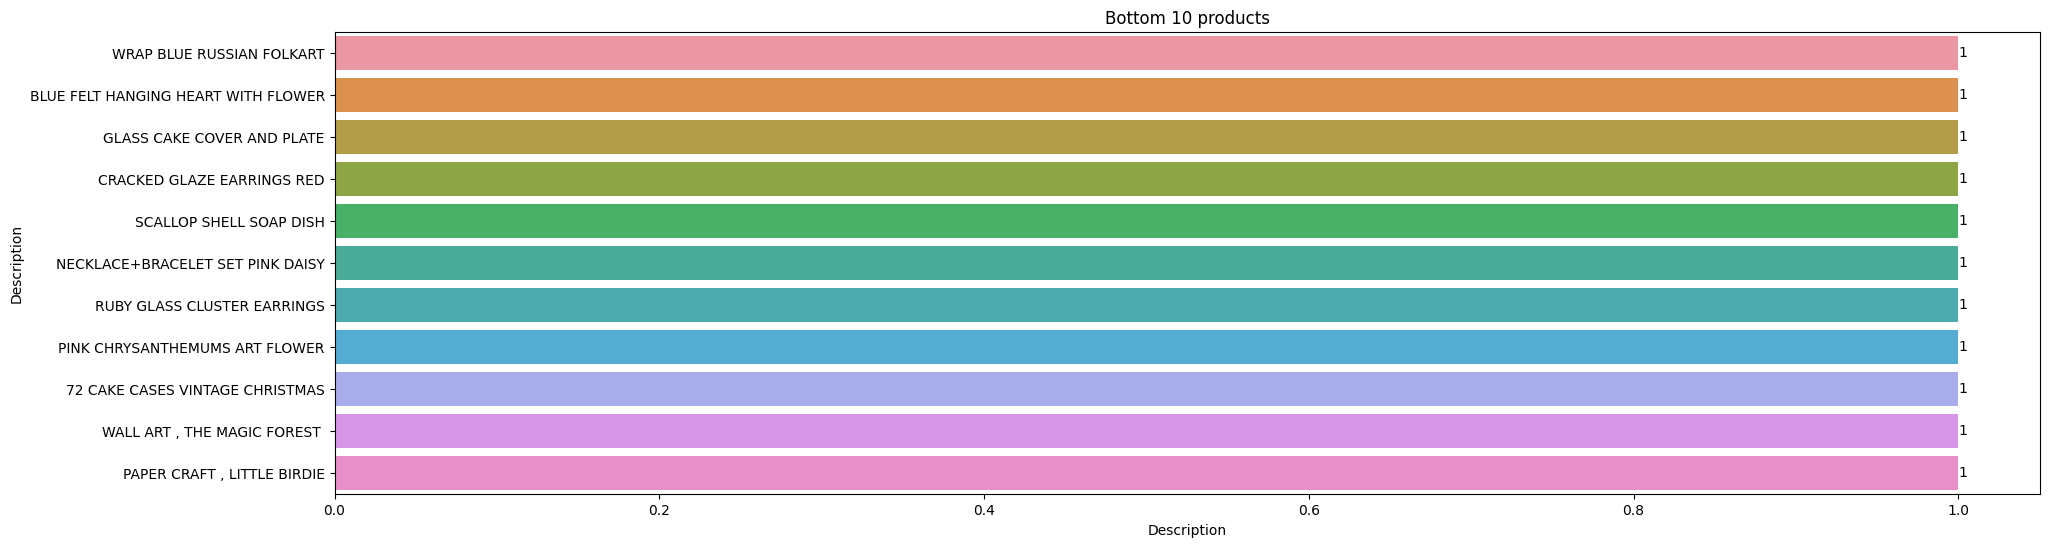

In [ ]:
# Chart - 10 visualization code
plot_count_hori_bottom(df,"Description","Bottom 10 products")

In [ ]:
# To clearly display the bottom 10 items.
n=10
df['Description'].value_counts()[-n:].index.tolist()

['BLUE FELT HANGING HEART WITH FLOWER',
 'GLASS CAKE COVER AND PLATE',
 'CRACKED GLAZE EARRINGS RED',
 'SCALLOP SHELL SOAP DISH',
 'NECKLACE+BRACELET SET PINK DAISY',
 'RUBY GLASS CLUSTER EARRINGS',
 'PINK CHRYSANTHEMUMS ART FLOWER',
 '72 CAKE CASES VINTAGE CHRISTMAS',
 'WALL ART , THE MAGIC FOREST ',
 'PAPER CRAFT , LITTLE BIRDIE']

#### 1. Why did you pick the specific chart?

We are using Seaborn's Countplot because it is used to count the number of occurences of observations in the respective categorical variables. We are printing the chart horizontally so that we can clearly see the name of the items.

#### 2. What is/are the insight(s) found from the chart?

From the above countplot, we can see that these bottom most products wewre sold only once in the year.

#### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

If the quantity of some of the products being sold is only 1 for the whole year, in this case we can recommend the store to remove these items from their inventory so that they can stock the more frequently sold items more and open up some more storage space. The store can also organize a clearance sale or some sort of "Last Chance" discounts, which will help iun clearing out the inventory and in turn generate some revenue for the store.

### Chart - 11

In [ ]:
# Chart - 11 visualization code

# Since the mean amount and total amount spent by the customers can be affected by outliers
# i.e. One very large value will take the total amount and average amount very high which is not
# indicative of the actual average amount spent by a customer at the superstore. So, we groupby the
# median value of amount spent by each customer for every day of the week.
df_weekday = df.groupby("week")['total_amt'].median().reset_index()
df_sorted = df_weekday.sort_values(by='total_amt', ascending=False).head(10)
df_sorted

week  total_amt
0     Friday      14.85
3   Thursday      14.75
5  Wednesday      13.16
4    Tuesday      12.70
1     Monday      11.90
2     Sunday       6.36

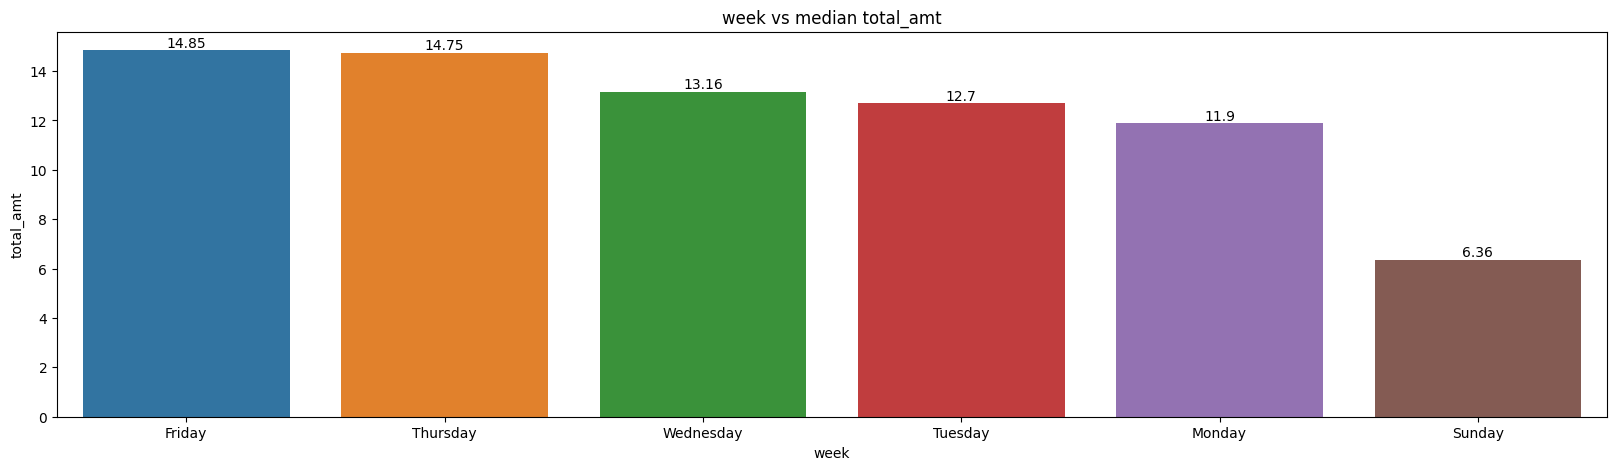

In [ ]:
plot_bar_chart(df_weekday,"week","total_amt", df_sorted['week'], "week vs median total_amt")

#### 1. Why did you pick the specific chart?

A bar chart is used when we want to show a distribution of data points or perform a comparison of metric values across different subgroups of your data.

#### 2. What is/are the insight(s) found from the chart?

We can see that the Median of transactions is maximum on Friday and Thursday followed closely by Wednesday, Tuesday and Monday. The least median transaction amount is on Sunday.

#### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Instead of average or sum, we are using Median here because median is not affected by outliers. Now, from the above visualization, we can see that Sunday lags behind a lot as compared to the other week days. For Sunday, we can suggest the store to host some events like Sunday Sampling events, where the customers can test and taste various products for free and if they like it, they buy. Sampling can lead to higher interest and higher revenue.

### Chart - 12

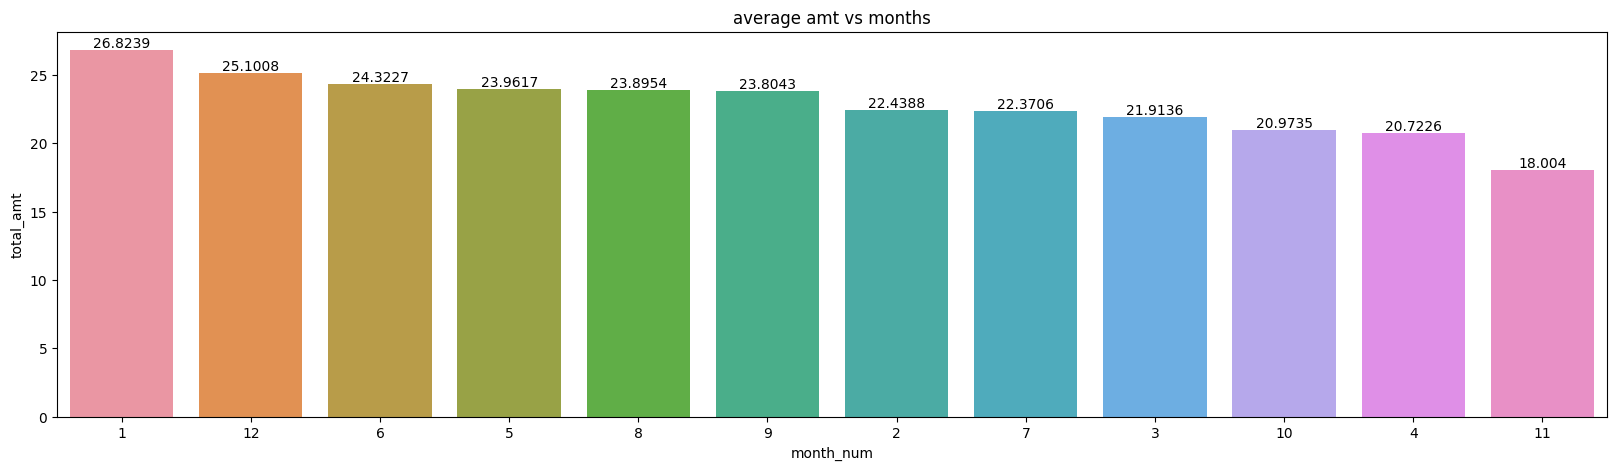

In [ ]:
# Chart - 12 visualization code
df_months = df.groupby("month_num")['total_amt'].mean().reset_index()
df_sorted = df_months.sort_values(by='total_amt', ascending=False).head(12)
plot_bar_chart(df_months,"month_num","total_amt", df_sorted['month_num'],"average amt vs months")

#### 1. Why did you pick the specific chart?

A bar chart is used when we want to show a distribution of data points or perform a comparison of metric values across different subgroups of your data.

#### 2. What is/are the insight(s) found from the chart?

From the above visualization, we can see that the winter months of January and December lead the way in terms of average amount spent in these months indicating that the customers buy more products during the winter months which maybe beverages and eateries as the temperatures reach freezing points during these months.

#### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Since the temperatures in the winter months reach the freezing points so people might stock up hot beverages like soups to keep themselves warm and enjoy the winters. This might be the reason of the higher average amount spent in the months of January and December. We can suggest the store to start racking up surplus in their inventory during the months of September and October, so that the items don't go out of stock during the winter months. The store can even offer discounts on multiple quantity purchases thereby attracting customers and inctreasing the CLV(Customer Lifetime Value).

### Chart - 13

<Axes: title={'center': 'Distribution of Quantity'}, xlabel='Quantity', ylabel='Density'>

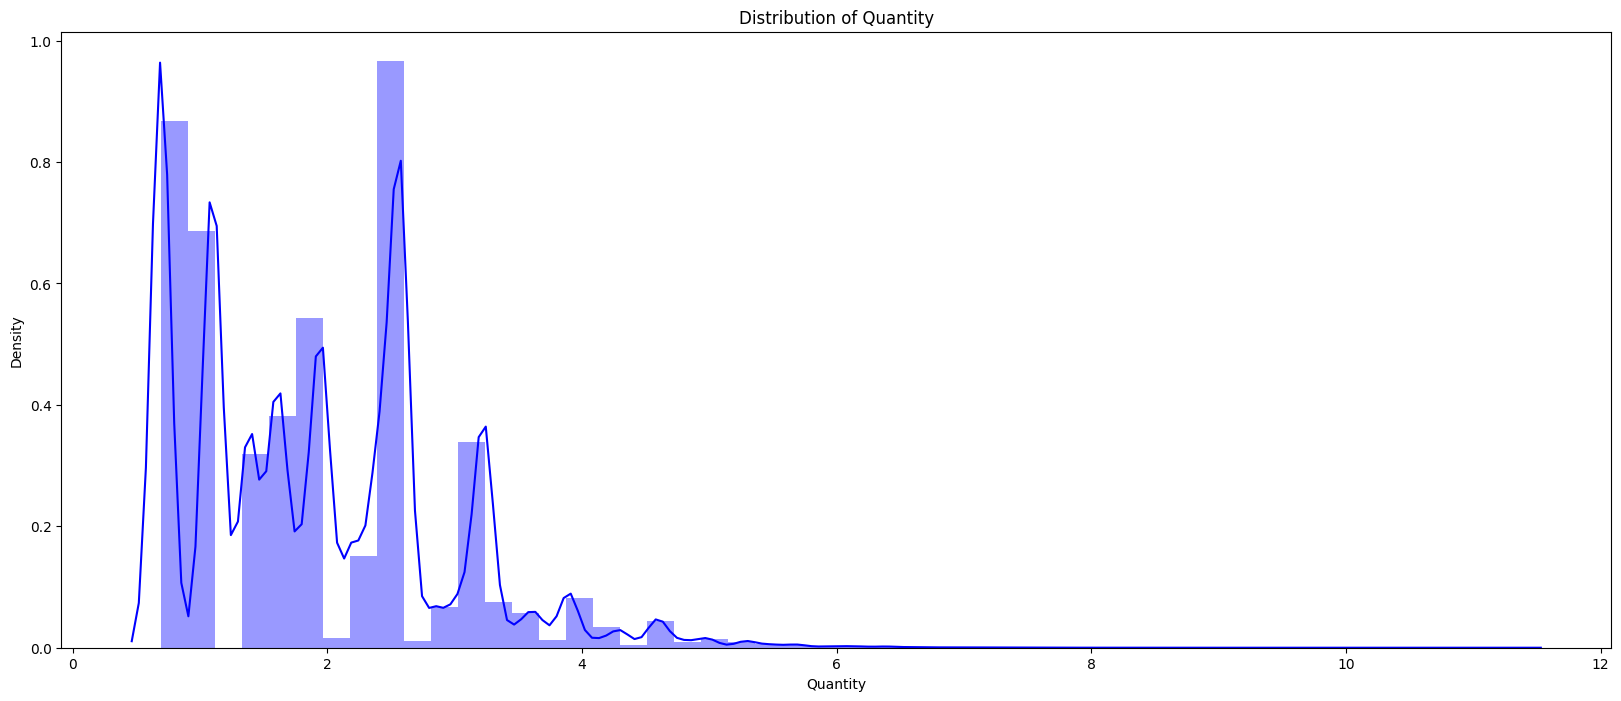

In [ ]:
# Chart - 13 visualization code
plt.figure(figsize = (20,8))
plt.title("Distribution of Quantity")
sns.distplot(np.log1p(df["Quantity"]), color ='blue')

#### 1. Why did you pick the specific chart?

Seaborn's Distplot is used for visualizing the distribution of a single variable

#### 2. What is/are the insight(s) found from the chart?

From the distribution of the Quantity variable, visualized above, we can see that most of the values of the quantity variable lies between 1 and 4, indicating that most of the customers buy only 1 quantity of a particular item they are interested in.

#### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

We have observed that most of the customers are buying only one quanity of the items they are buying. To improve this, we suggest the store to introduce discounts on buying more than one quantity of the same item. This will help the customers to save money buying the same product with more quantity. For the store, it will be beneficial as the quantity of products that get sold increases, the store can make more revenue.

### Chart - 15 - Correlation Heatmap

<Axes: >

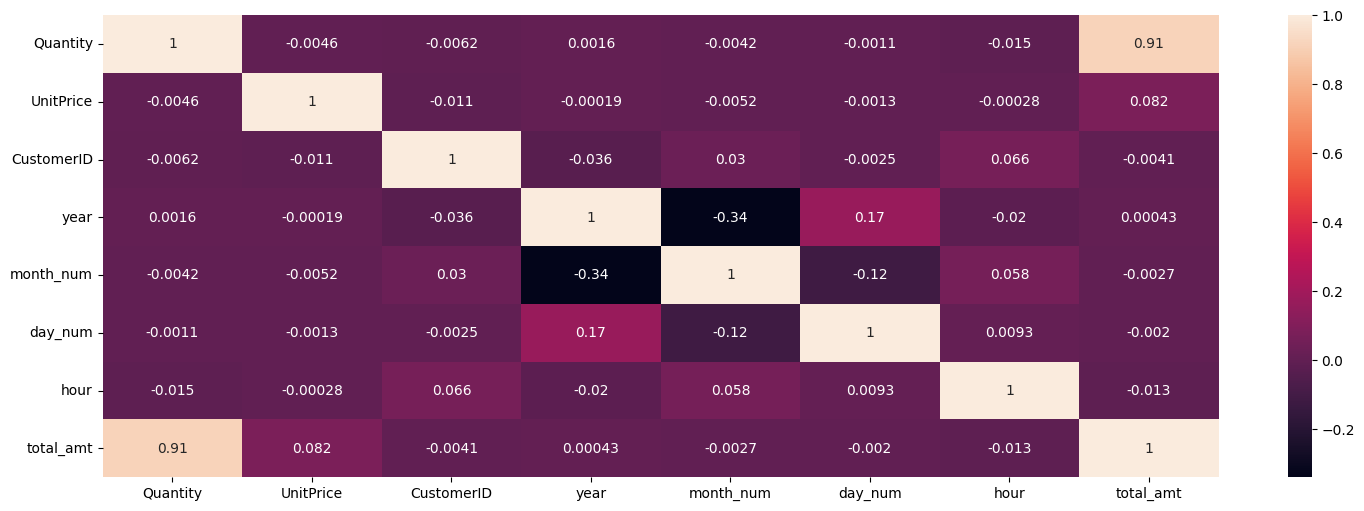

In [ ]:
# Correlation Heatmap visualization code
fig,ax = plt.subplots(figsize=(18,6))
sns.heatmap(df.corr(), annot= True)

#### 1. What is/are the insight(s) found from the chart?

From the correaltion heatmap above, we can see that "Quantity' and "total_amt" have a very high degree of positive correlation. The columns "year" and "month_num" have a quite a bit level of negative correlation. The very high degree of positive correlation of 0.91 between "Quantity" and "total_amt" is because of the fact that total_amount is equal to quantity multilpied by the price.


##**5. Create the RFM Model (Recency, Frequency, Monetary Value)**

Recency, Frequency, Monetary value is a marketing analysis tool used to identify a company's or organization's best customers by using certain measures. The RFM model is based on three quantitative factors :

1.   Recency:- Last seen

2.   Frequency:- How often a customer makes a purchase

3.   Monetary Value:- How much money a customer spends on an item

### Performing RFM Segementation and Analysis, Step by Step

The first step in building a RFM model to assign Recency, Frequency and Monetary Values to each customer.
The second step is to divide the customer list into tiered groups for each of the three dimensions (R, F and M).

**Calculating RFM Scores:-**
The score is usually between 3 or 5. If you decide to code each RFM attribute into 3 categories, you'll end up with 27 different coding combinations ranging from a high of 333 to a low of 111. Generally higher the RFM score, the more valuable the customer.

In [ ]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'year', 'month_num', 'day_num',
       'hour', 'week', 'total_amt'],
      dtype='object')

In [ ]:
# Recency - Lastest Date - Last Invoice Date, Frequency - Count of invoice no of transactions
# Monetary Value - Sum of Total
import datetime as dt
latest_date = dt.datetime(2011,12,10)
rfm_df = df.groupby('CustomerID').agg({'InvoiceDate':lambda x : (latest_date - x.max()).days, 'InvoiceNo' : lambda x: len(x), 'total_amt': lambda x: x.sum()})

In [ ]:
rfm_df['InvoiceDate'] = rfm_df['InvoiceDate'].astype(int)
rfm_df.rename(columns = {'InvoiceDate': 'Recency', 'InvoiceNo' : 'Frequency', 'total_amt' : 'Monetary'}, inplace = True)
rfm_df.reset_index().head()

CustomerID  Recency  Frequency  Monetary
0       12346      325          1  77183.60
1       12347        2        182   4310.00
2       12348       75         31   1797.24
3       12349       18         73   1757.55
4       12350      310         17    334.40

In [ ]:
# Having a look at the statistics of the Recency column.
rfm_df.Recency.describe()

count    4338.000000
mean       92.059474
std       100.012264
min         0.000000
25%        17.000000
50%        50.000000
75%       141.750000
max       373.000000
Name: Recency, dtype: float64

<Axes: xlabel='Recency', ylabel='Density'>

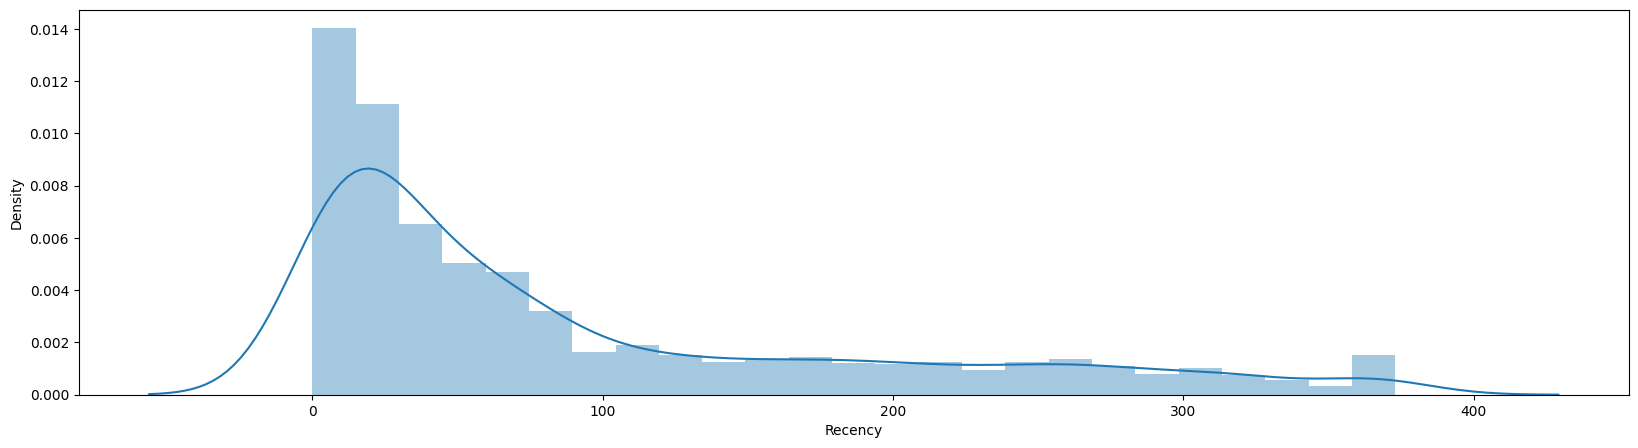

In [ ]:
# Having a look at the distribution of the Recency column
x = rfm_df['Recency']
plt.figure(figsize = (20,5))
sns.distplot(x)

In [ ]:
# Having a look at the statistics of Frequency column.
rfm_df.Frequency.describe()

count    4338.000000
mean       91.720609
std       228.785094
min         1.000000
25%        17.000000
50%        41.000000
75%       100.000000
max      7847.000000
Name: Frequency, dtype: float64

<Axes: xlabel='Frequency', ylabel='Density'>

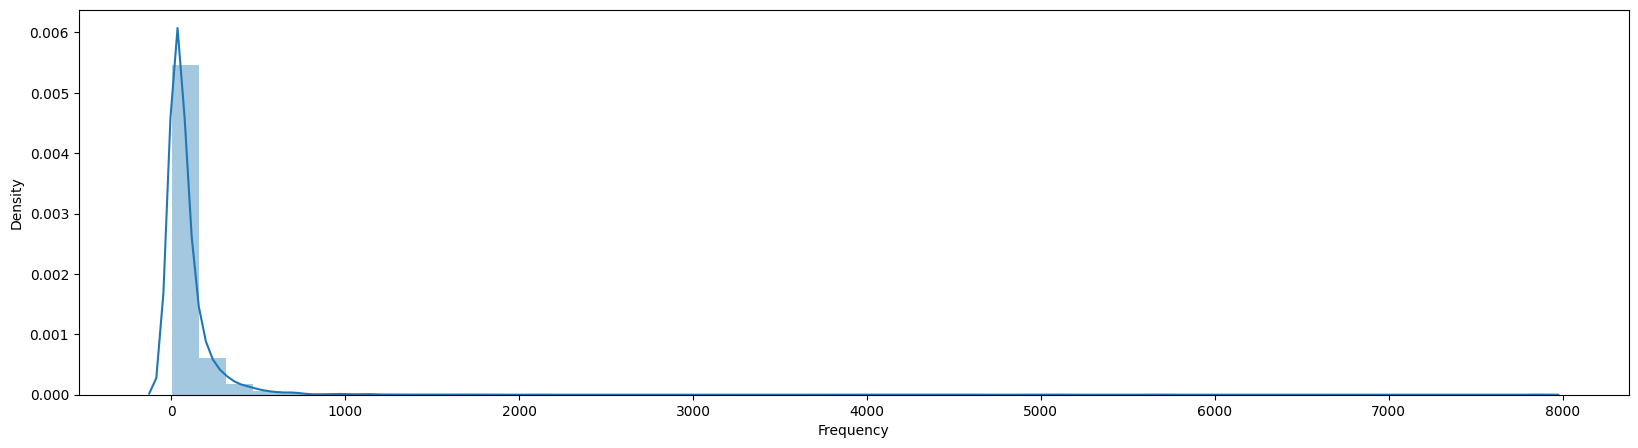

In [ ]:
# Having a look at the distribution of the Frequency column
x = rfm_df['Frequency']
plt.figure(figsize = (20,5))
sns.distplot(x)

In [ ]:
# Having a look at the statistics of Monetary column.
rfm_df.Monetary.describe()

count      4338.000000
mean       2054.266460
std        8989.230441
min           3.750000
25%         307.415000
50%         674.485000
75%        1661.740000
max      280206.020000
Name: Monetary, dtype: float64

<Axes: xlabel='Monetary', ylabel='Density'>

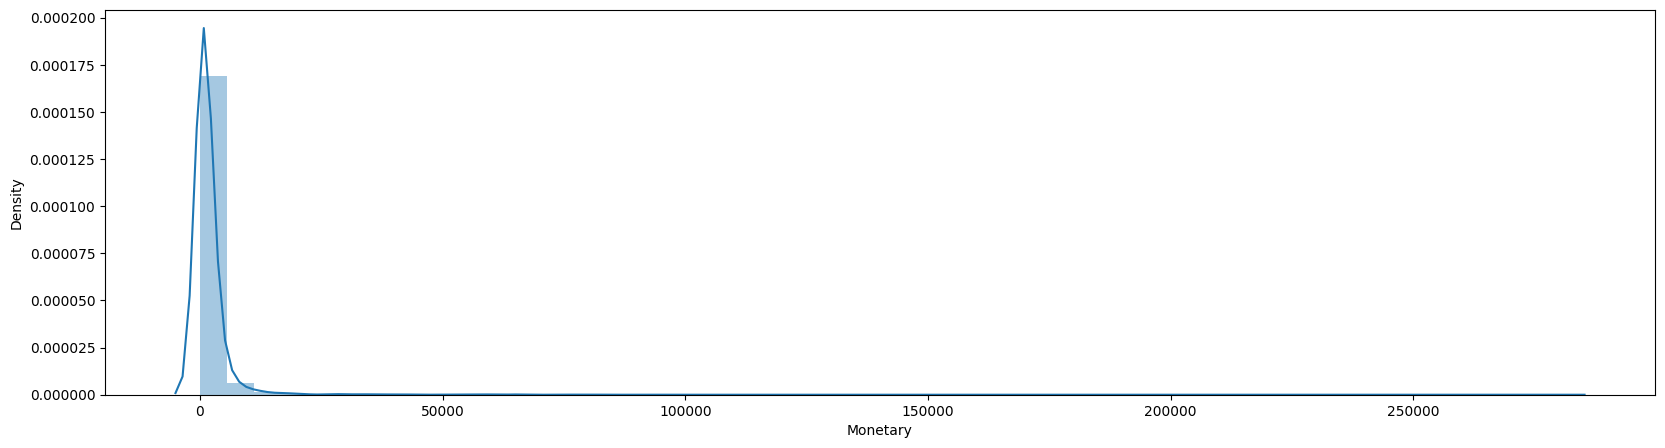

In [ ]:
# Having a look at the distribution of the Monetary column
x = rfm_df['Monetary']
plt.figure(figsize = (20,5))
sns.distplot(x)

In [ ]:
quantiles = rfm_df.quantile(q=[0.25, 0.5, 0.75])
quantiles = quantiles.to_dict()
quantiles

{'Recency': {0.25: 17.0, 0.5: 50.0, 0.75: 141.75},
 'Frequency': {0.25: 17.0, 0.5: 41.0, 0.75: 100.0},
 'Monetary': {0.25: 307.41499999999996,
  0.5: 674.4849999999999,
  0.75: 1661.7400000000002}}

In [ ]:
def RScoring(x, p, d):
  if x <= d[p][0.25]:
    return 1
  elif x <= d[p][0.5]:
    return 2
  elif x <= d[p][0.75]:
    return 3
  else:
    return 4

def FnMScoring(x, p, d):
  if x <= d[p][0.25]:
    return 4
  elif x <= d[p][0.5]:
    return 3
  elif x <= d[p][0.75]:
    return 2
  else:
    return 1

In [ ]:
# Calculating and adding R,F and M segments values columns in the existing dataset to show R,F,M segment values
# based on the quantiles(quartiles) they are lying in.
rfm_df["R"] = rfm_df['Recency'].apply(RScoring,args=('Recency',quantiles,))
rfm_df["F"] = rfm_df['Frequency'].apply(FnMScoring,args=('Frequency',quantiles,))
rfm_df["M"] = rfm_df['Monetary'].apply(FnMScoring,args=('Monetary',quantiles,))
rfm_df.head()

Recency  Frequency  Monetary  R  F  M
CustomerID                                       
12346           325          1  77183.60  4  4  1
12347             2        182   4310.00  1  1  1
12348            75         31   1797.24  3  3  1
12349            18         73   1757.55  2  2  1
12350           310         17    334.40  4  4  3

In [ ]:
rfm_df['RFMGroup'] = rfm_df.R.map(str)+rfm_df.F.map(str)+rfm_df.M.map(str)
rfm_df['RFMScore'] = rfm_df[['R', 'F', 'M']].sum(axis = 1)
rfm_df.head()

Recency  Frequency  Monetary  R  F  M RFMGroup  RFMScore
CustomerID                                                          
12346           325          1  77183.60  4  4  1      441         9
12347             2        182   4310.00  1  1  1      111         3
12348            75         31   1797.24  3  3  1      331         7
12349            18         73   1757.55  2  2  1      221         5
12350           310         17    334.40  4  4  3      443        11

**We will be using quantiles(quartiles) to segment the customers into 4 categories:- Bronze, Silver, Gold and Platinum**

In [ ]:
# Assign Loyalty Level to each customer
loyalty_level = ['Platinum','Gold','Silver','Bronze']
score_cut = pd.qcut(rfm_df['RFMScore'],q = 4,labels=loyalty_level)
rfm_df['RFM_Loyalty_Level'] = score_cut.values
rfm_df.reset_index().head()

CustomerID  Recency  Frequency  Monetary  R  F  M RFMGroup  RFMScore  \
0       12346      325          1  77183.60  4  4  1      441         9   
1       12347        2        182   4310.00  1  1  1      111         3   
2       12348       75         31   1797.24  3  3  1      331         7   
3       12349       18         73   1757.55  2  2  1      221         5   
4       12350      310         17    334.40  4  4  3      443        11   

  RFM_Loyalty_Level  
0            Silver  
1          Platinum  
2              Gold  
3          Platinum  
4            Bronze

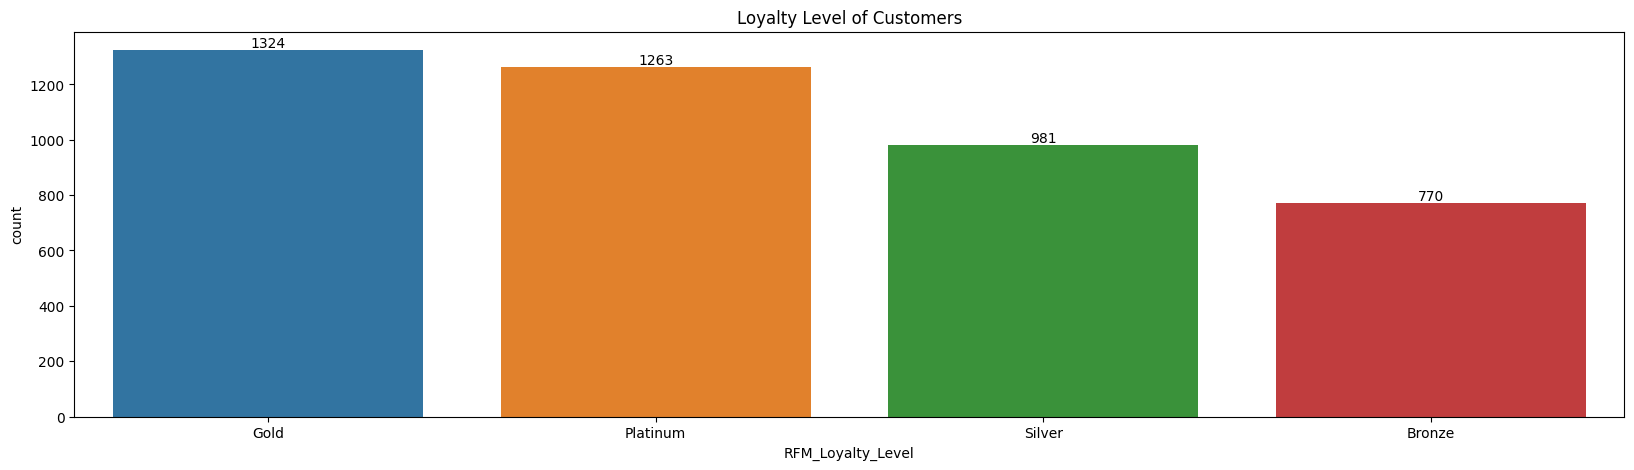

In [ ]:
# Plotting a simple countplot to check the number of customers for each level
plot_count_plot(rfm_df,"RFM_Loyalty_Level", "Loyalty Level of Customers" )

In [ ]:
# Handling negative and zero values so as to not encounter
# infinity problem during log transformation
def handle_neg_n_zero(num):
  if num <= 0:
    return 1
  else:
    return num

#Apply the newly made function to Recency and Monetary columns
rfm_df['Recency'] = [handle_neg_n_zero(x) for  x in rfm_df.Recency]
rfm_df['Monetary'] = [handle_neg_n_zero(x) for x in rfm_df.Monetary]

# Performing log transformation to normalize the values
log_data = rfm_df[['Recency', 'Frequency', 'Monetary']].apply(np.log, axis = 1).round(3)

<Axes: xlabel='Recency', ylabel='Density'>

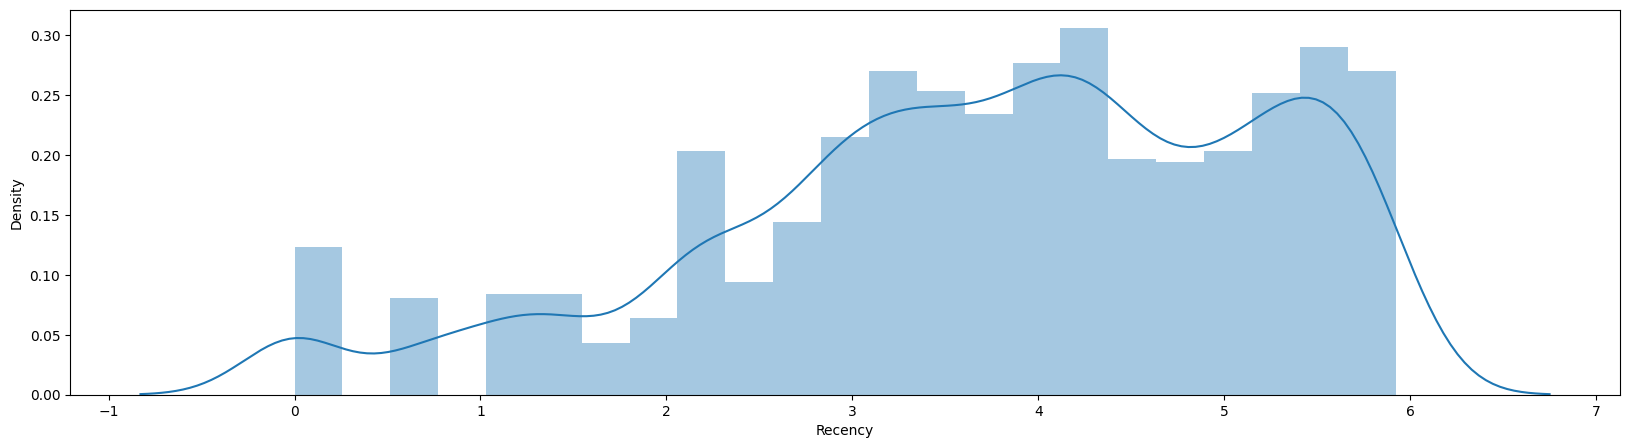

In [ ]:
# plotting the distribution for Recency column after normalization
x = log_data['Recency']
plt.figure(figsize = (20,5))
sns.distplot(x)

<Axes: xlabel='Monetary', ylabel='Density'>

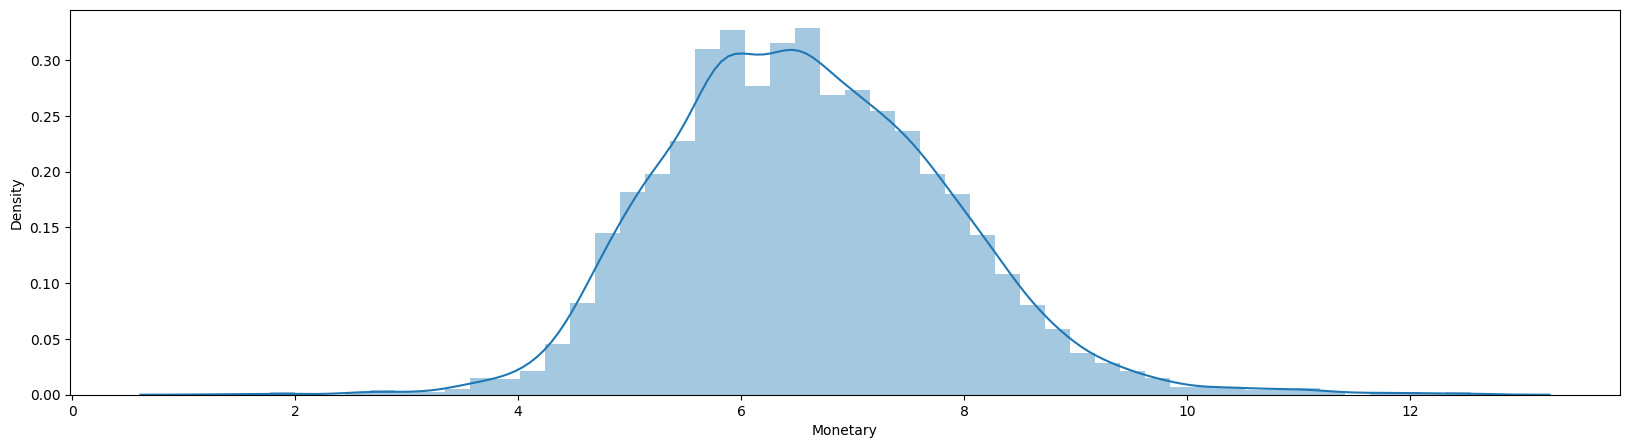

In [ ]:
# plotting the distribution for Frequency column after log transformation
x = log_data.query('Monetary < 10000')['Monetary']
plt.figure(figsize = (20,5))
sns.distplot(x)

In [ ]:
# Applying the log teansformation on the Recency, Frequency and Monetry column.
rfm_df['Recency_log'] = rfm_df['Recency'].apply(math.log)
rfm_df['Frequency_log'] = rfm_df['Frequency'].apply(math.log)
rfm_df['Monetary_log'] = rfm_df['Monetary'].apply(math.log)

## ***6. ML Model Implementation***

### **1) KMeans**

#### **Silhouette Score Method**

**Silhouette Score Analysis is a metric used to assess the quality of clusters formed by a clustering algorithm. It measures how well separated the clusters are, with scores ranging from -1 to 1. A high Silhouette Score suggests that the clusters are well-defined while a low Silhouette Score suggests that the clusters are poorly formed or are overlapping. The score is computed for each point based on its distance to other points within the same cluster(a) and the neighbouring cluster(b). The formula is (b-a)/(max(a,b)). Silhouette Score Analysis helps in choosing the optimal number of clusters by comparing scores for different number of clusters, aiding in the evaluation and selection of clustering models.**

In [ ]:
# ML Model - 1 Implementation
# Selecting "Recency_log" and "Monetary_log" features for clustering
features_rec_mon = ['Recency_log','Monetary_log']
x_features_ns = rfm_df[features_rec_mon].values

#Standardize the selected features using StandardScaler
scaler_rec_mon = preprocessing.StandardScaler()
x_features_scaled = scaler_rec_mon.fit_transform(x_features_ns)
x = x_features_scaled

# List to store silhouette scores for different cluster numbers
sil_score = []

# Range of cluster numbers to evaluate
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

# Iterate over different cluster numbers
for i in range_n_clusters:

  # Create a KMeans cluster model with the specified number of clusters
  clusterer = KMeans(n_clusters = i)

  # Predict cluster labels and cluster centers
  preds = clusterer.fit_predict(x)
  centers = clusterer.cluster_centers_

  # Calculate Silhouette score for the specified number of clusters
  score = silhouette_score(x, preds)
  print("For cluster number {}, silhouette score is {}".format(i, score))

  # Append the Silhouette score to the list
  sil_score.append(silhouette_score(x, clusterer.labels_))

For cluster number 2, silhouette score is 0.421461308316105
For cluster number 3, silhouette score is 0.3429873976235534
For cluster number 4, silhouette score is 0.3649026703672768
For cluster number 5, silhouette score is 0.3352920215016303
For cluster number 6, silhouette score is 0.34451227323419537
For cluster number 7, silhouette score is 0.34737806196922943
For cluster number 8, silhouette score is 0.3394470315049547
For cluster number 9, silhouette score is 0.34606612028648787
For cluster number 10, silhouette score is 0.34829856174650975
For cluster number 11, silhouette score is 0.3380014809282155
For cluster number 12, silhouette score is 0.34311299144060503
For cluster number 13, silhouette score is 0.342316425538268
For cluster number 14, silhouette score is 0.33408990026121516
For cluster number 15, silhouette score is 0.33769423267017634


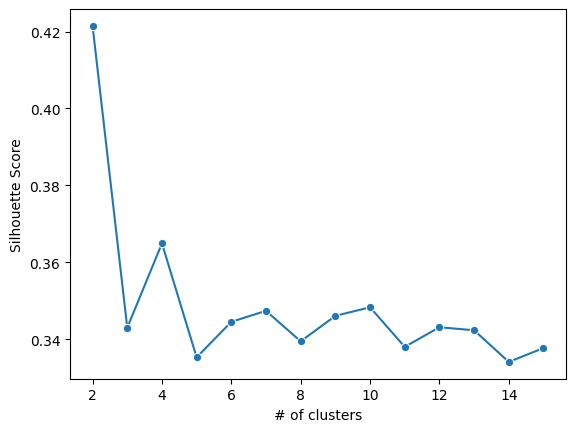

In [ ]:
# Plotting the Silhouette score with the optimal number of clusters
plot = sns.lineplot(x=range_n_clusters, y=sil_score, marker = 'o')
plot.set_xlabel("# of clusters");
plot.set_ylabel("Silhouette Score");

In [ ]:
# ML Model - 1 Implementation
# Selecting Frequency_log and Monetary_log features for clustering
features_rec_mon = ['Frequency_log','Monetary_log']
x_features_ns = rfm_df[features_rec_mon].values

# Standardize the selected features using StandardScaler
scaler_rec_mon = preprocessing.StandardScaler()
x_features_scaled = scaler_rec_mon.fit_transform(x_features_ns)
x = x_features_scaled

# List to store Silhouette scores for different cluster numbers
sil_score = []

# Range of cluster numbers to evaluate
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

# Iterate over different cluster numbers
for i in range_n_clusters:

  # Create a KMeans model with the specified number of clusters
  clusterer = KMeans(n_clusters = i)

  # Predict cluster labels and centers
  preds = clusterer.fit_predict(x)
  centers = clusterer.cluster_centers_

  # Calculate cluster numbers for the specified number of clusters
  score = silhouette_score(x, preds)
  print("For cluster number {}, silhouette score is {}".format(i, score))

  # Append the Silhouette score to the list
  sil_score.append(silhouette_score(x, clusterer.labels_))

For cluster number 2, silhouette score is 0.4786630429359192
For cluster number 3, silhouette score is 0.4074717886000471
For cluster number 4, silhouette score is 0.370994527259079
For cluster number 5, silhouette score is 0.34529843624366424
For cluster number 6, silhouette score is 0.3595528550421189
For cluster number 7, silhouette score is 0.3381310746081596
For cluster number 8, silhouette score is 0.34651128701426503
For cluster number 9, silhouette score is 0.3432175087470399
For cluster number 10, silhouette score is 0.35891386303343653
For cluster number 11, silhouette score is 0.36927123219655894
For cluster number 12, silhouette score is 0.35357019230402525
For cluster number 13, silhouette score is 0.3610147970544124
For cluster number 14, silhouette score is 0.3692464977382984
For cluster number 15, silhouette score is 0.36191142180075114


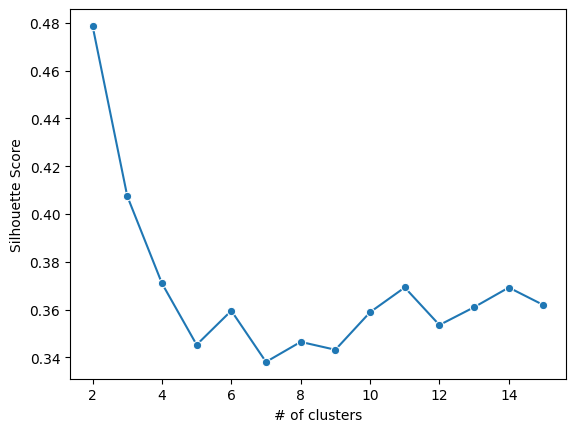

In [ ]:
# Plotting the Silhouette score with the optimal number of clusters
plot = sns.lineplot(x=range_n_clusters, y=sil_score, marker = 'o')
plot.set_xlabel("# of clusters");
plot.set_ylabel("Silhouette Score");

**We can clearly see that the Silhouette Score for number of clusters = 2 is significantly higher as compared to others. So, we choose the appropriate number of clsuters to be 2.**

For the cluster number = 2, the average silhouette score is = 0.395423791756615
For the cluster number = 3, the average silhouette score is = 0.3031065868149085
For the cluster number = 4, the average silhouette score is = 0.30271251896193013
For the cluster number = 5, the average silhouette score is = 0.2788183528013028
For the cluster number = 6, the average silhouette score is = 0.2789560652501828
For the cluster number = 7, the average silhouette score is = 0.2614088853737028
For the cluster number = 8, the average silhouette score is = 0.2658269960916127
For the cluster number = 9, the average silhouette score is = 0.2526135714347661
For the cluster number = 10, the average silhouette score is = 0.2527507580594714
For the cluster number = 11, the average silhouette score is = 0.25949011692937746
For the cluster number = 12, the average silhouette score is = 0.2663795273695271
For the cluster number = 13, the average silhouette score is = 0.2627030046261212
For the cluster number 

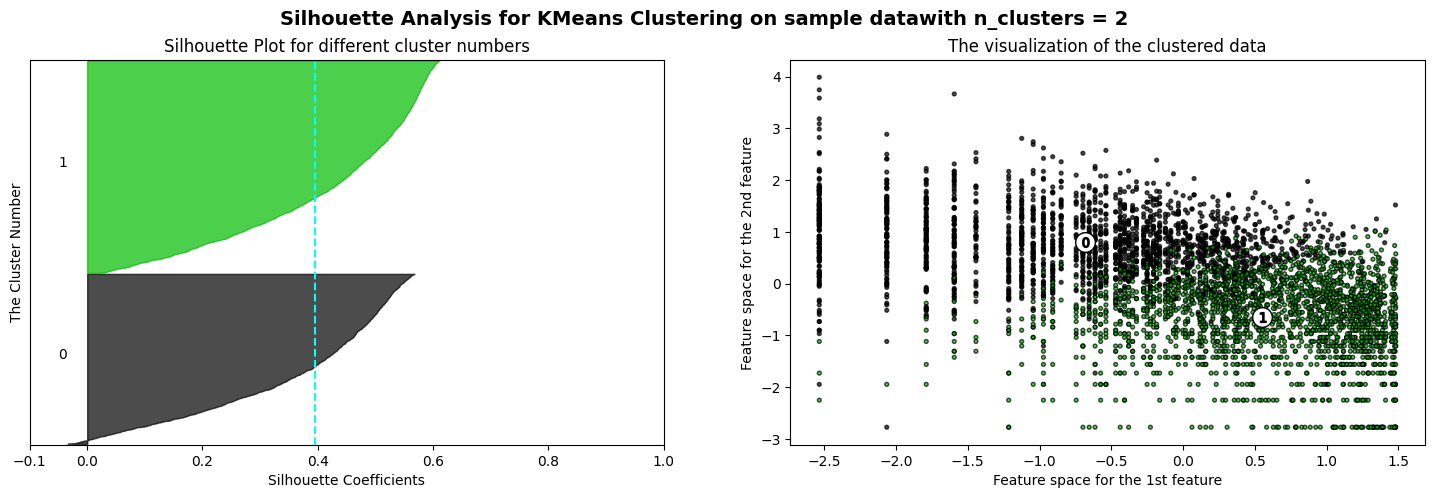

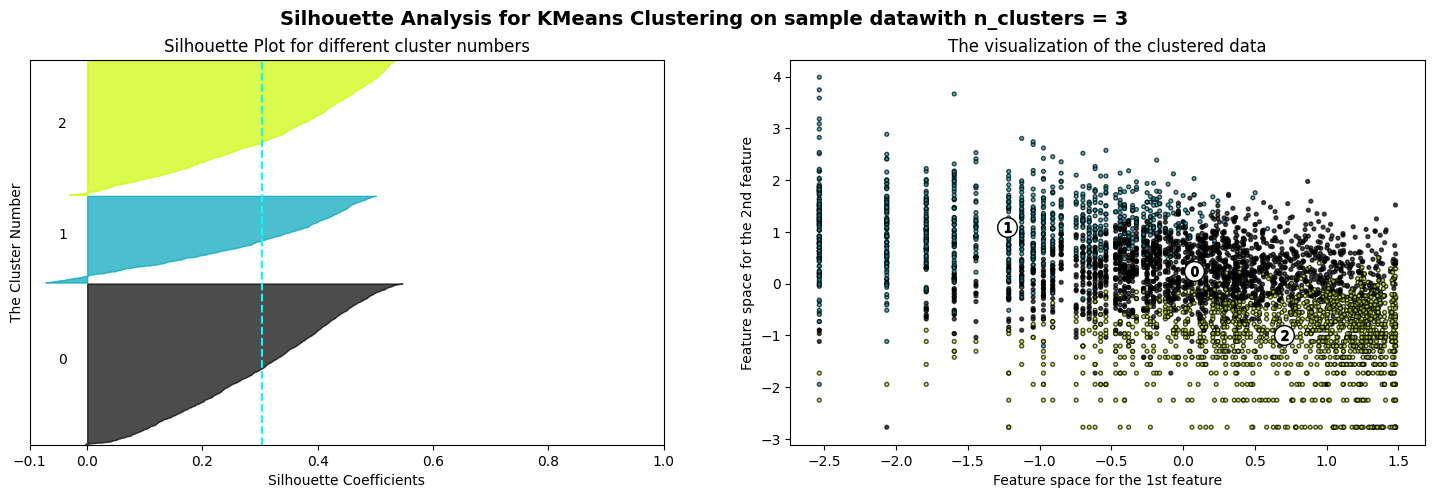

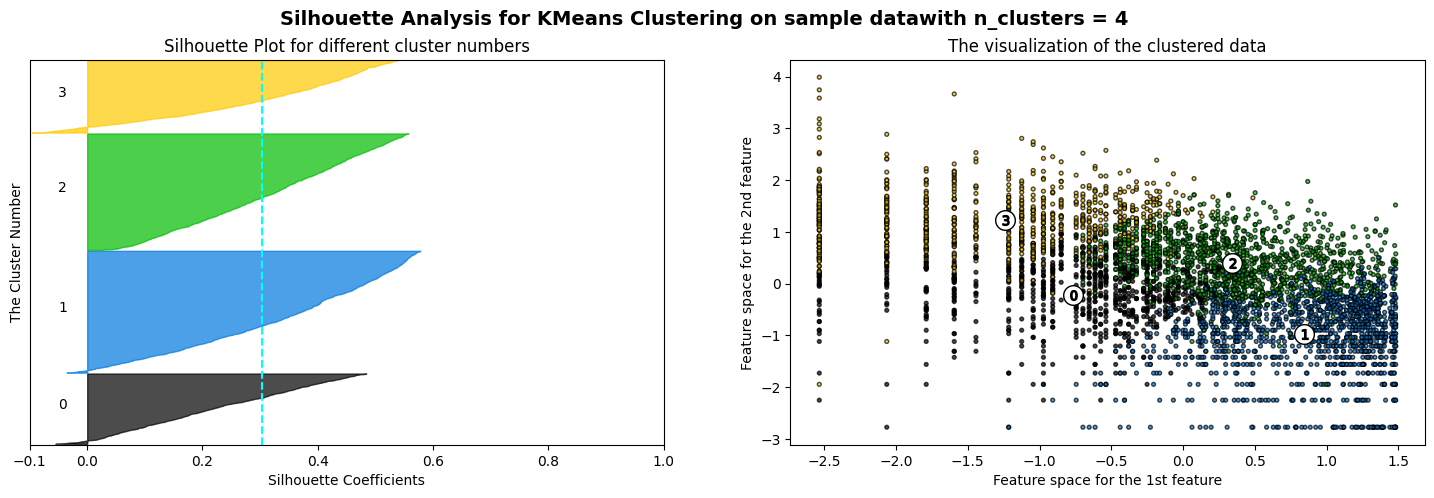

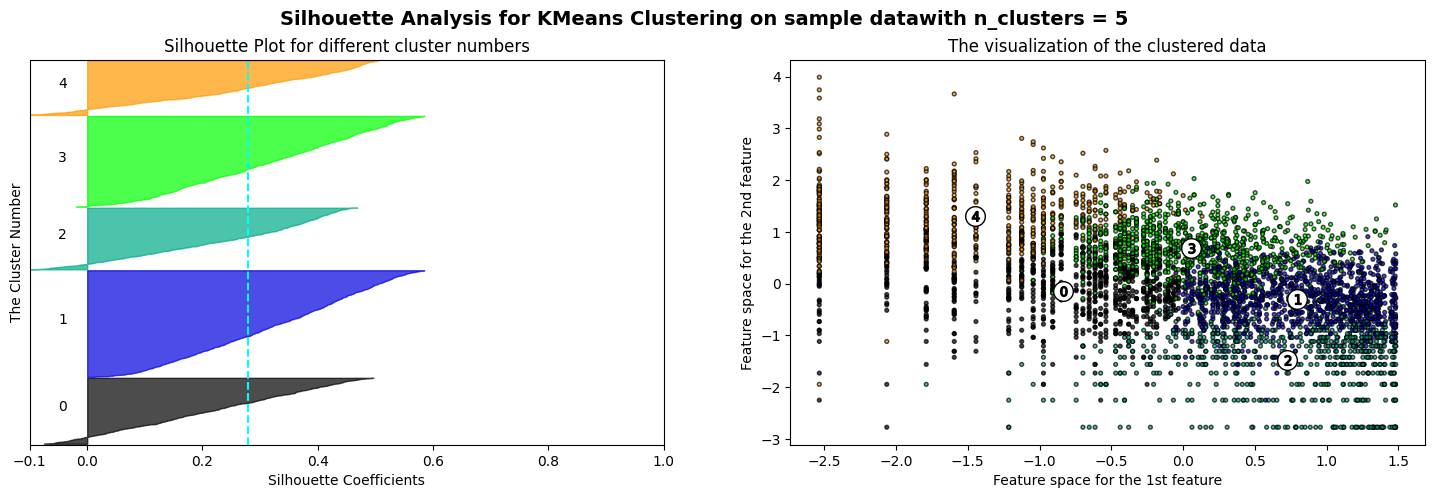

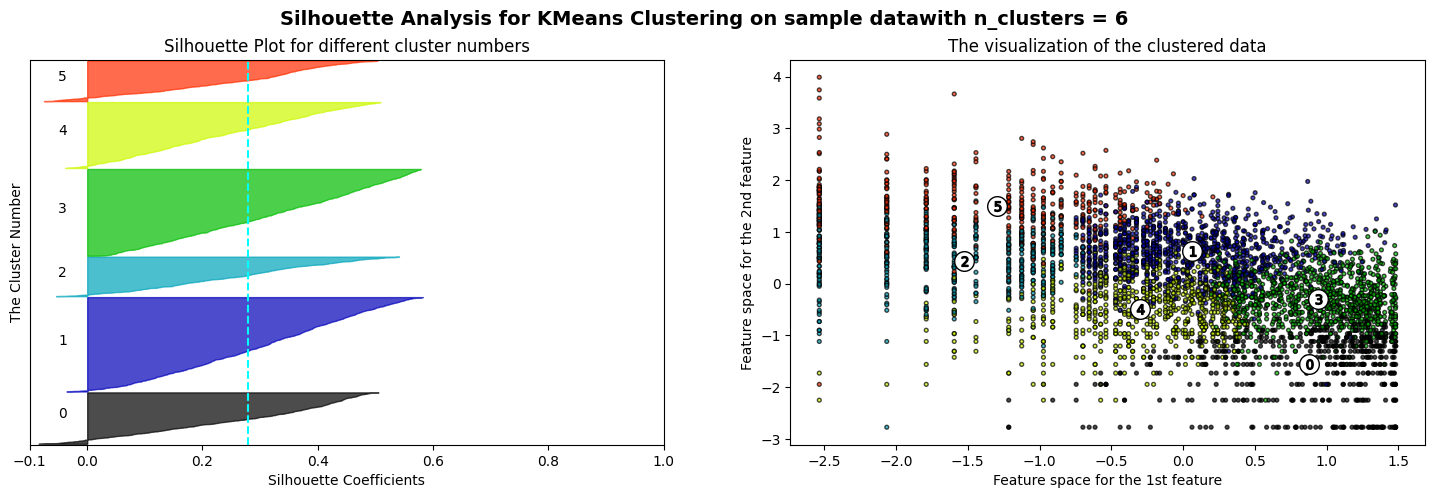

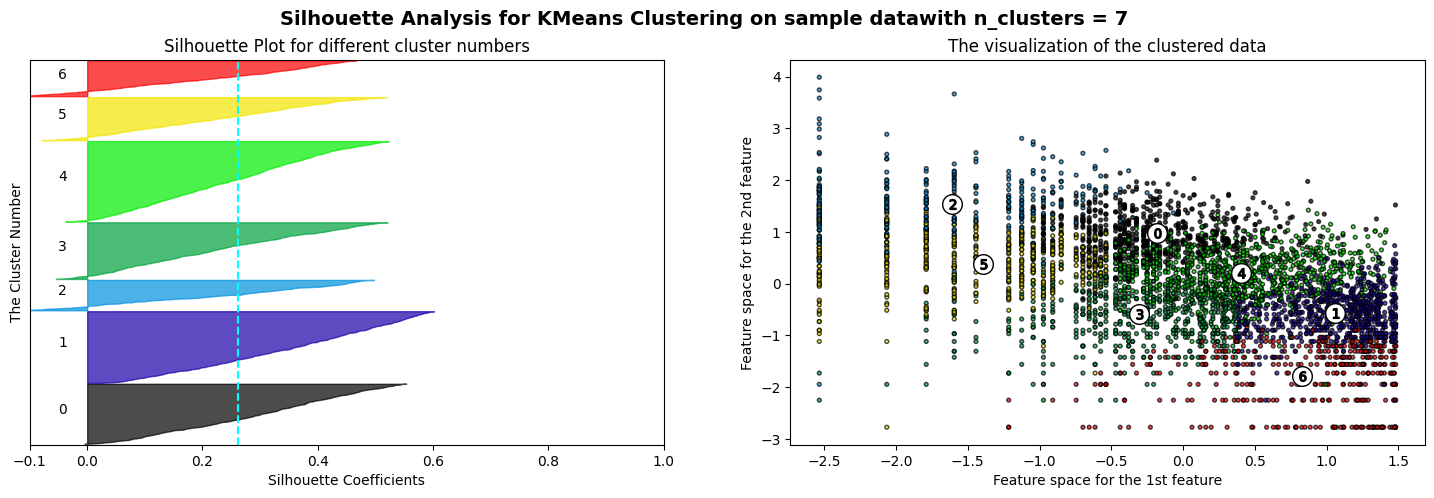

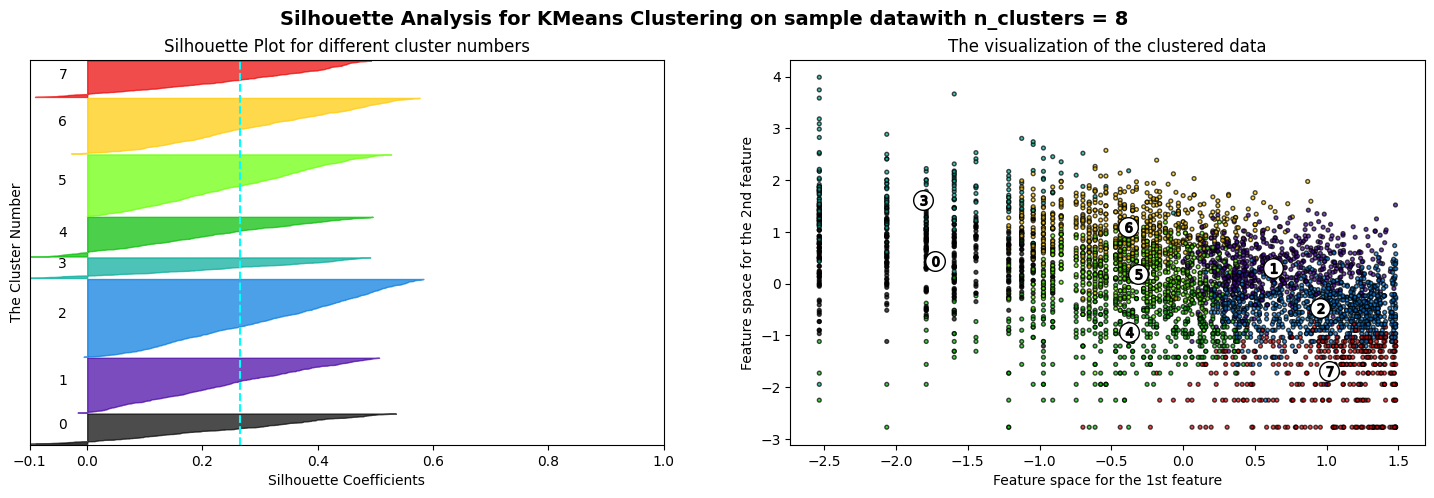

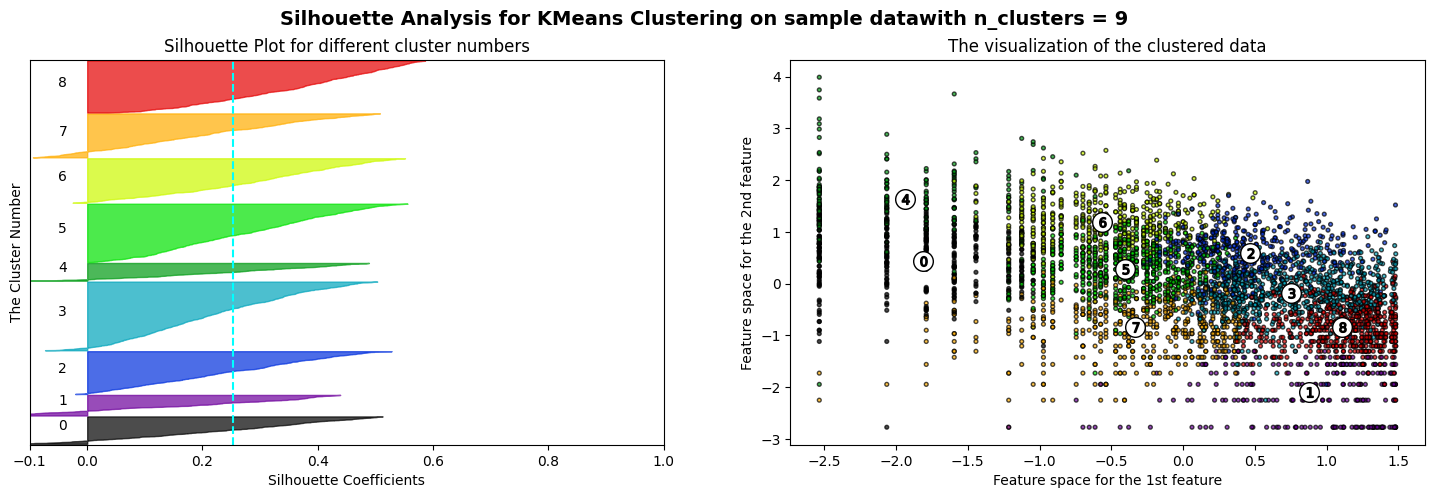

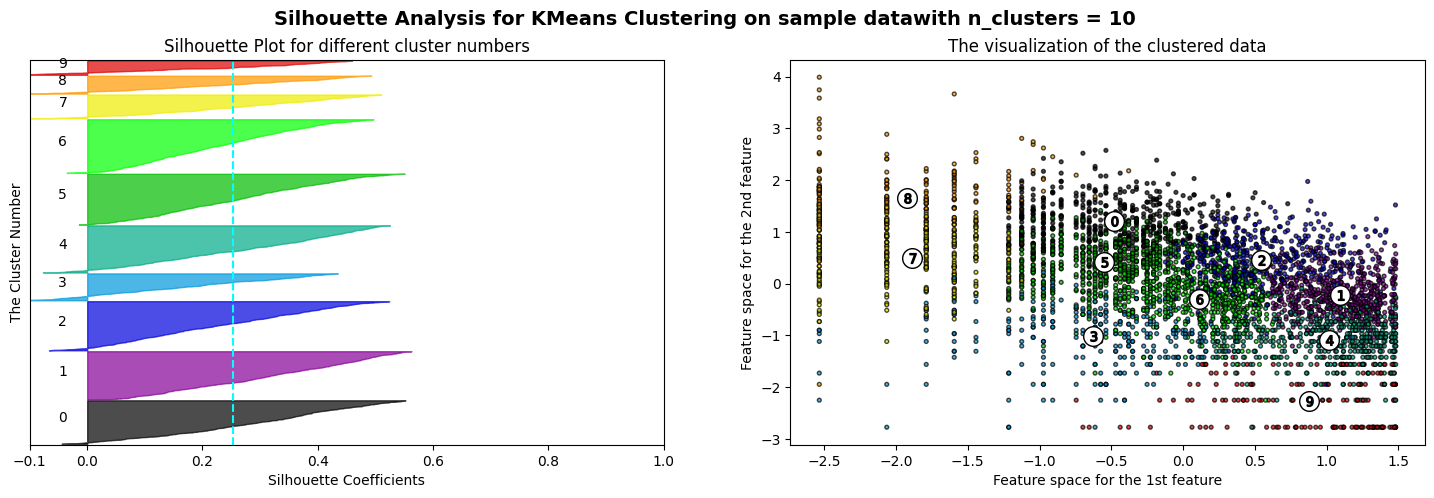

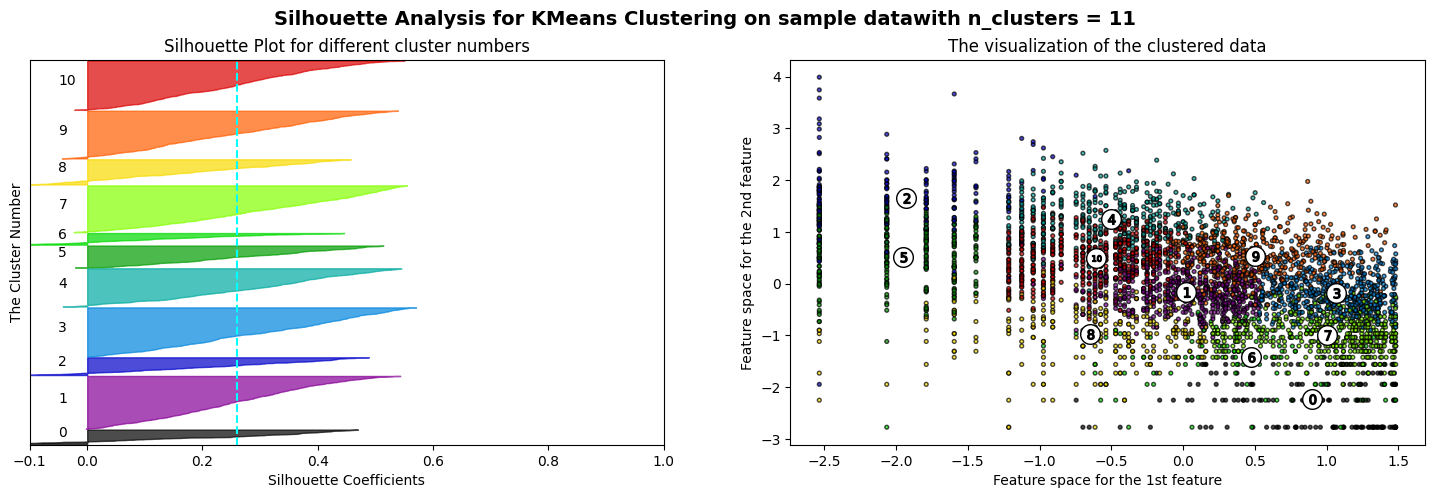

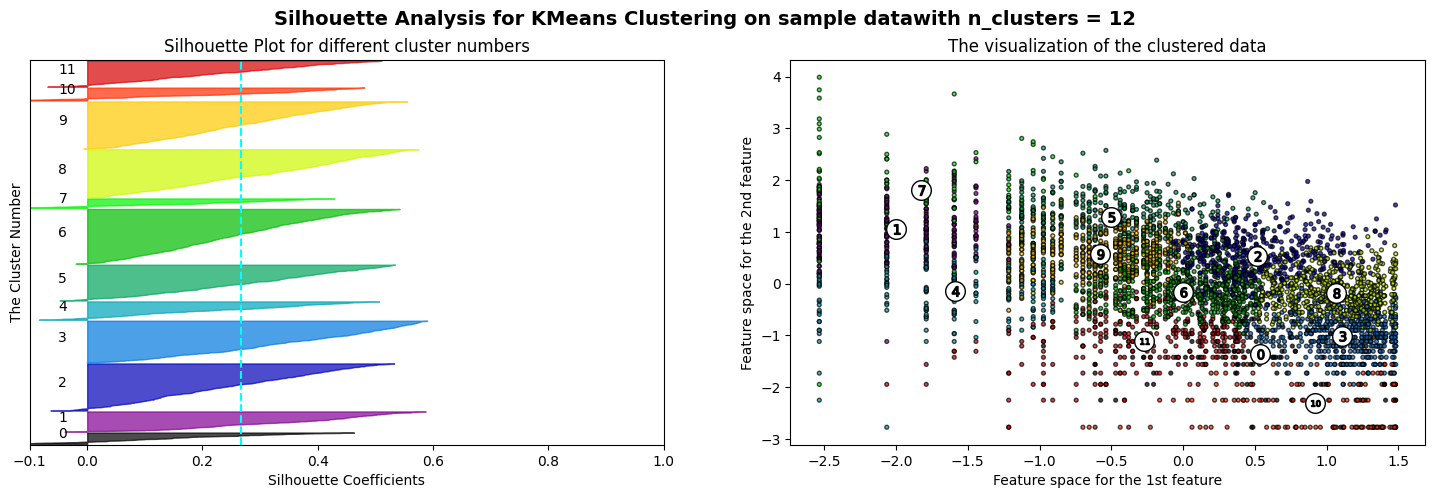

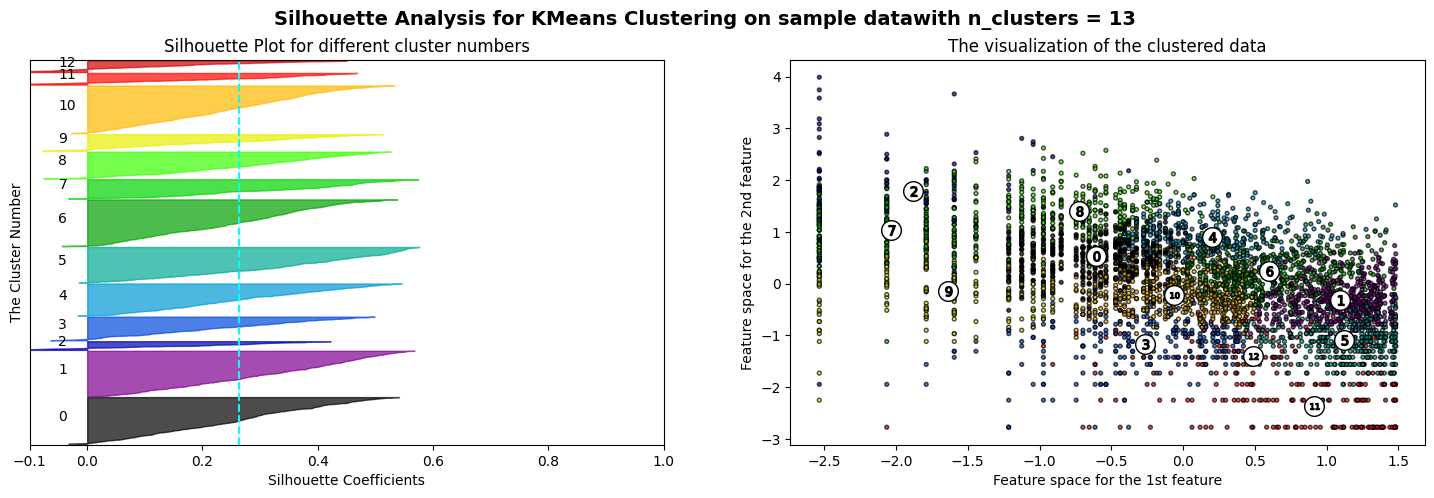

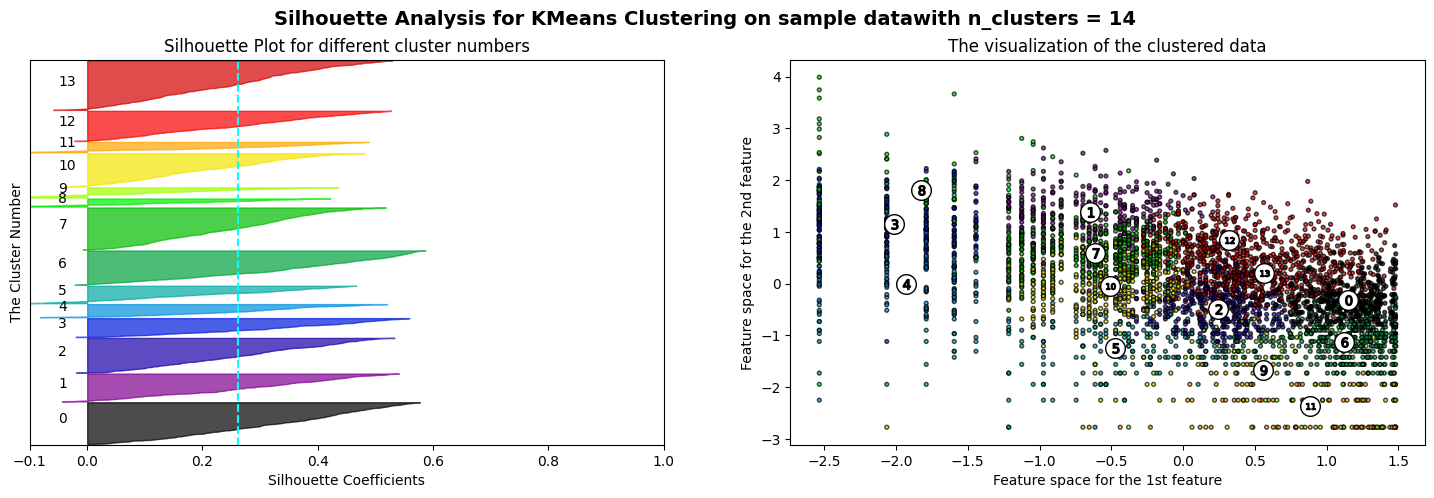

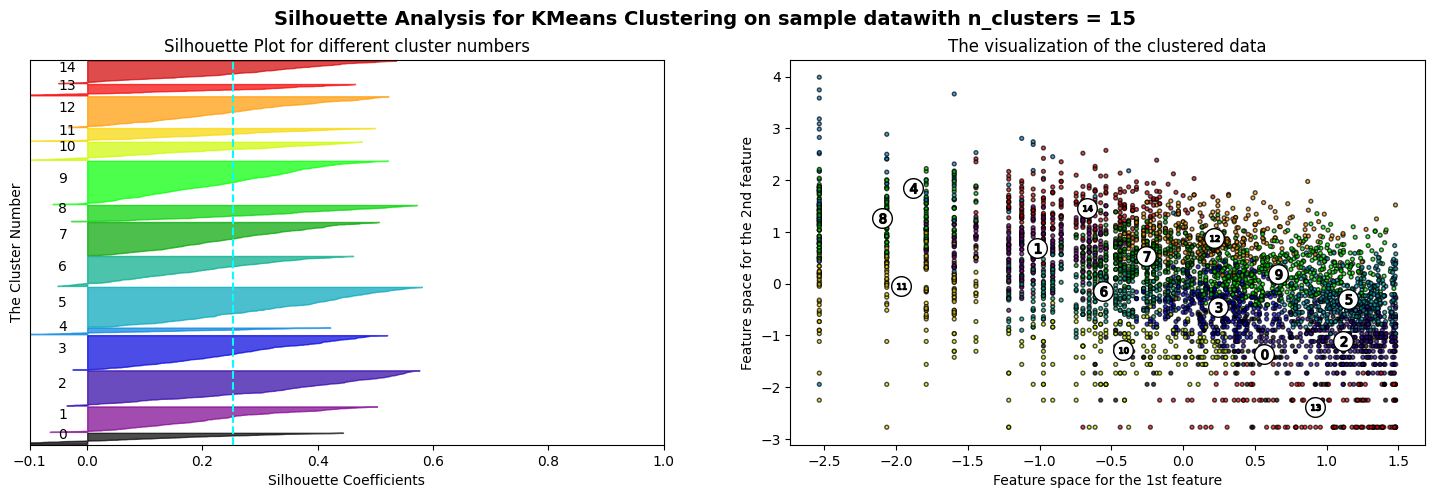

In [ ]:
# Now applying Silhouette Score method on RFM
# rfm_df is our dataframe containing Recency_log, Frequency_log, Monetary_log
feature_vector = ['Recency_log', 'Frequency_log', 'Monetary_log']
x_features = rfm_df[feature_vector].values

# Standardize the features using Vector Scaler
scaler = preprocessing.StandardScaler()
x = scaler.fit_transform(x_features)

# define the number of clusters to evaluate
num_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

# Iterate over different clusters
for i in num_clusters:

  # Create a silhouette plot for different silhouette plots
  # and cluster visualizations
  fig, (ax1, ax2) = plt.subplots(1,2)
  fig.set_size_inches(18,5)
  ax1.set_xlim([-0.1,1])
  ax1.set_ylim([0, len(x) + (i + 1)*10])

  # Perform KMeans CLustering
  clusterer = KMeans(n_clusters = i, random_state = 42)
  cluster_labels = clusterer.fit_predict(x)

  # Calculate average Silhouette Score
  silhouette_avg = silhouette_score(x, cluster_labels)
  print("For the cluster number = {}, the average silhouette score is = {}".format(i, silhouette_avg))

  # Calculate Silhouette values for each sample
  sample_silhouette_values = silhouette_samples(x, cluster_labels)
  y_lower = 10

  # Iterate over each cluster to plot the Silhouette values
  for j in range(i):

    # Extract Silhouette scores for the current cluster
    jth_cluster_silhouette_values = sample_silhouette_values[cluster_labels == j]

    # Sort Silhouette scores in ascending order
    jth_cluster_silhouette_values.sort()

    # Calculate the size of the current cluster
    size_cluster_j = jth_cluster_silhouette_values.shape[0]

    # Calculate the Upper and Lower Bounds for filling the Silhouette plot
    y_upper = y_lower + size_cluster_j
    color = cm.nipy_spectral(float(j) / i)

    # Fill the Silhouette plot for the current cluster
    ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, jth_cluster_silhouette_values, facecolor = color, edgecolor = color, alpha = 0.7)

    # Add a label indicating the cluster number at the
    # midpoint of the Silhouette plot
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_j, str(j))
    y_lower = y_upper + 10

  # Finalize the customization for the Silhouette plot
  ax1.set_title("Silhouette Plot for different cluster numbers")
  ax1.set_xlabel("Silhouette Coefficients")
  ax1.set_ylabel("The Cluster Number")
  ax1.axvline(x = silhouette_avg, color="cyan", linestyle="--")
  ax1.set_yticks([])
  ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

  # Plot cluster visualization
  colors=cm.nipy_spectral(cluster_labels.astype(float)/i)
  ax2.scatter(x[:, 0], x[:, 1], marker = '.', c=colors, alpha = 0.7, s = 30, edgecolor = 'k')

  # Plot cluster centers
  centers = clusterer.cluster_centers_
  ax2.scatter(centers[:,0], centers[:, 1], marker = 'o', c='white', alpha = 1, s = 200, edgecolor = 'k')

  # Finalize customization for cluster visualization plot
  for j, c in enumerate(centers):
    ax2.scatter(c[0], c[1], marker="$%d$" %j, alpha = 1, s = 50, edgecolor = 'k')
  ax2.set_title("The visualization of the clustered data")
  ax2.set_xlabel("Feature space for the 1st feature")
  ax2.set_ylabel("Feature space for the 2nd feature")

  # Title for the entire visualization
  plt.suptitle(("Silhouette Analysis for KMeans Clustering on sample data""with n_clusters = %d" % i), fontsize = 14, fontweight = 'bold')
plt.show()

**From Silhouette Score analysis for various number of clusters, we see that having 2 clusters gave the maximum Average Silhouette Score. So, we choose the appropriate number of clusters to be 2**

#### **Elbow Method**

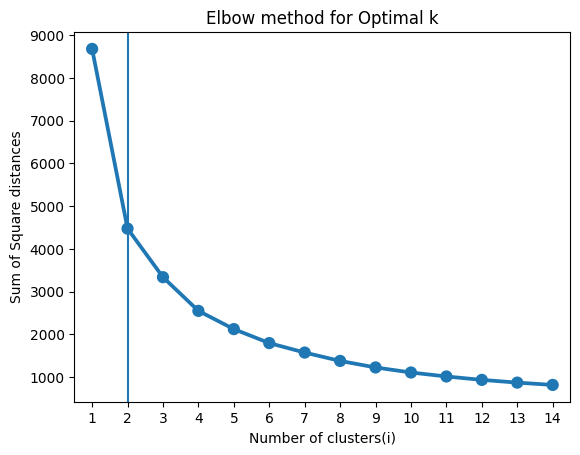

In [ ]:
# Selecting Recency_log and Monetary_log for clustering
features_rec_mon = ['Recency_log','Monetary_log']
x_features_ns = rfm_df[features_rec_mon].values

# Standardize the selected features using StandardScaler
scaler_rec_mon = preprocessing.StandardScaler()
x_features_scaled = scaler_rec_mon.fit_transform(x_features_ns)
x = x_features_scaled

# Dictionary to store the sum of squared differences
# for different cluster numbers
sum_of_sq_dist = {}

# Iterate over a range of cluster numbers to find the optimal
# k using the Elbow Method
for i in range (1, 15):

  # Create a Kmeans model with "kmeans++" initialization and
  # maximum iterations set to 1000
  km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 1000)

  # Fit the model to the standardized features
  km = km.fit(x)

  #Store the sum of squared differences for the current number of clusters
  sum_of_sq_dist[i] = km.inertia_

# Plotting the Elbow curve to find out the optimal number of clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))

# Highlighting the point for k = 1
plt.axvline(x=1)
plt.xlabel("Number of clusters(i)")
plt.ylabel('Sum of Square distances')
plt.title("Elbow method for Optimal k")
plt.show()

**We can clearly see that the Elbow starts at the 2nd cluster. This further strengthens the argument of the appropriate number of clusters to be 2**

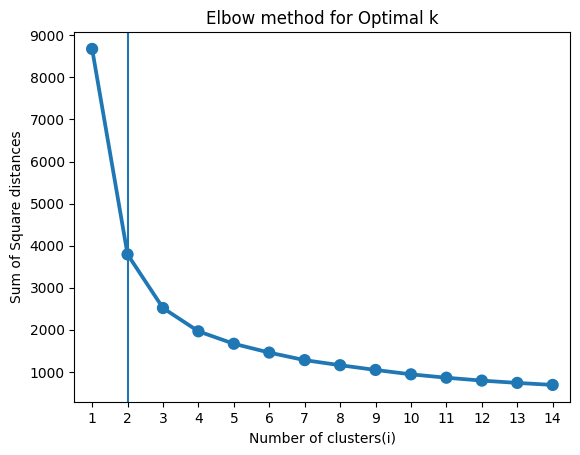

In [ ]:
# Selecting Frequency_log and Monetary_log for clustering
features_rec_mon = ['Frequency_log','Monetary_log']
x_features_ns = rfm_df[features_rec_mon].values

# Standardize the selected features using Standard Scaler
scaler_rec_mon = preprocessing.StandardScaler()
x_features_scaled = scaler_rec_mon.fit_transform(x_features_ns)
x = x_features_scaled

# Dictionary to store the sum of squared differences
# for different cluster numbers
sum_of_sq_dist = {}

# Iterate over a range of cluster numbers to find the optimal
# k using the Elbow Method
for i in range (1, 15):

  # Create a Kmeans model with "kmeans++" initialization and
  # maximum iterations set to 1000
  km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 1000)

  # Fit the model to the standardized features
  km = km.fit(x)

  #Store the sum of squared differences for the current number of clusters
  sum_of_sq_dist[i] = km.inertia_

# Plotting the Elbow curve to find out the optimal number of clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))

# Highlighting the point for k = 1
plt.axvline(x=1)
plt.xlabel("Number of clusters(i)")
plt.ylabel('Sum of Square distances')
plt.title("Elbow method for Optimal k")
plt.show()

**The diagram clearly indicates that the optimal number of clusters is 2**

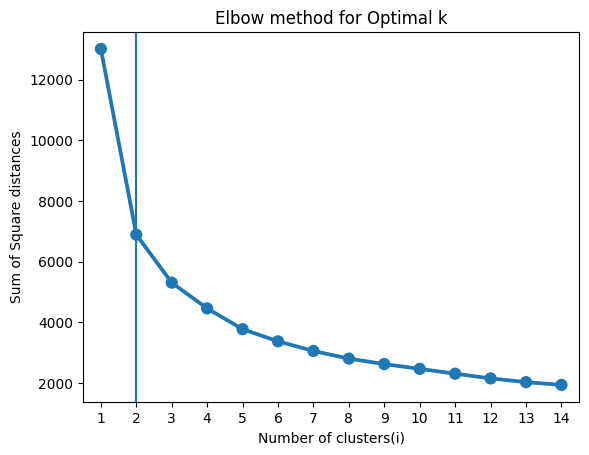

In [ ]:
# Selecting Recency_log, Frequency_log and Monetary_log for clustering
feature_vector = ['Recency_log', 'Frequency_log', 'Monetary_log']
x_features = rfm_df[feature_vector].values

# Standardize the selected features using Standard Scaler
scaler = preprocessing.StandardScaler()
x = scaler.fit_transform(x_features)

# Dictionary to store the sum of squared differences
# for different cluster numbers
sum_of_sq_dist = {}

# Iterate over a range of cluster numbers to find the optimal
# k using the Elbow Method
for i in range (1, 15):

  # Create a Kmeans model with "kmeans++" initialization and
  # maximum iterations set to 1000
  km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 1000)

  # Fit the model to the standardized features
  km = km.fit(x)

  #Store the sum of squared differences for the current number of clusters
  sum_of_sq_dist[i] = km.inertia_

# Plotting the Elbow curve to find out the optimal number of clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))

# Highlighting the point for k = 1
plt.axvline(x=1)
plt.xlabel("Number of clusters(i)")
plt.ylabel('Sum of Square distances')
plt.title("Elbow method for Optimal k")
plt.show()

###**Looking at the point where the elbow starts, we can say that the most suitable number of clusters is 2**

In [ ]:
clusterer = KMeans(n_clusters = 2)
y_preds = clusterer.fit_predict(x)
rfm_df["Cluster number assigned"] = clusterer.labels_
rfm_df

Recency  Frequency  Monetary  R  F  M RFMGroup  RFMScore  \
CustomerID                                                             
12346           325          1  77183.60  4  4  1      441         9   
12347             2        182   4310.00  1  1  1      111         3   
12348            75         31   1797.24  3  3  1      331         7   
12349            18         73   1757.55  2  2  1      221         5   
12350           310         17    334.40  4  4  3      443        11   
...             ...        ...       ... .. .. ..      ...       ...   
18280           277         10    180.60  4  4  4      444        12   
18281           180          7     80.82  4  4  4      444        12   
18282             7         12    178.05  1  4  4      144         9   
18283             3        756   2094.88  1  1  1      111         3   
18287            42         70   1837.28  2  2  1      221         5   

           RFM_Loyalty_Level  Recency_log  Frequency_log  Monetary_log  \
CustomerID                                                               
12346                 Silver     5.783825       0.000000     11.253942   
12347               Platinum     0.693147       5.204007      8.368693   
12348                   Gold     4.317488       3.433987      7.494007   
12349               Platinum     2.890372       4.290459      7.471676   
12350                 Bronze     5.736572       2.833213      5.812338   
...                      ...          ...            ...           ...   
18280                 Bronze     5.624018       2.302585      5.196285   
18281                 Bronze     5.192957       1.945910      4.392224   
18282                 Silver     1.945910       2.484907      5.182064   
18283               Platinum     1.098612       6.628041      7.647252   
18287               Platinum     3.737670       4.248495      7.516041   

            Cluster number assigned  
CustomerID                           
12346                             1  
12347                             0  
12348                             1  
12349                             0  
12350                             1  
...                             ...  
18280                             1  
18281                             1  
18282                             1  
18283                             0  
18287                             0  

[4338 rows x 13 columns]

In [ ]:
centers = clusterer.cluster_centers_
print("The cluster centers are:-", centers)

The cluster centers are:- [[-0.68506989  0.79819435  0.80012812]
 [ 0.55371009 -0.64514333 -0.64670631]]



### **2) DBSCAN**

**DBSCAN (Density Based Spatial Clustering of Applications with Noise) is a clustering algorithm that groups data points based on their density. It identifies core points with a sufficient number of neighbours in a specified radius, expands clusters iteratively from these points and categorized points as Core, Border or Noise. Unlike KMeans, DBSCAN does not require specifying the number of clusters in advance and is effective in discovering clusters of arbitrary shapes. It is well suited for applications where clusters may haave varying shapes and densities. However, parameter senstivity remains a consideration in its application.

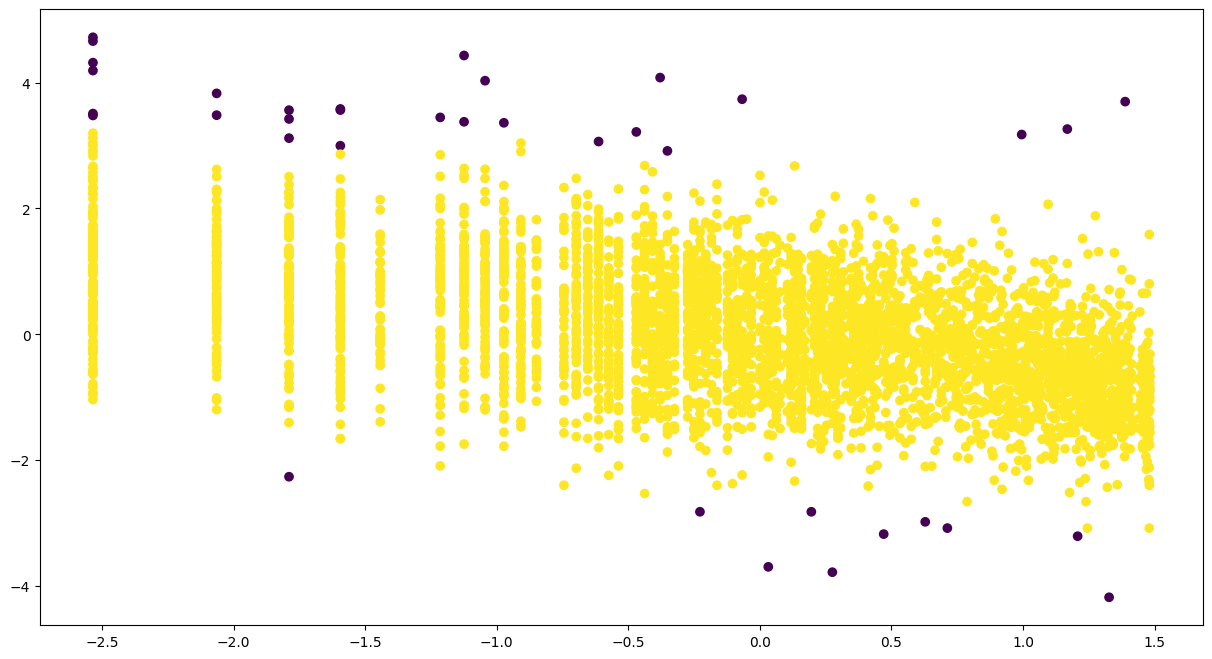

In [ ]:
# ML Model - 3 Implementation
features_rec_mon = ['Recency_log','Monetary_log']
x_features_ns = rfm_df[features_rec_mon].values
scaler_rec_mon = preprocessing.StandardScaler()
x_features_scaled = scaler_rec_mon.fit_transform(x_features_ns)
x = x_features_scaled
y_pred = DBSCAN(eps = 0.5, min_samples = 15).fit_predict(x)
plt.figure(figsize=(15,8))
plt.scatter(x[:, 0], x[:, 1], c = y_pred)

**The estimated number of clusters is 2**

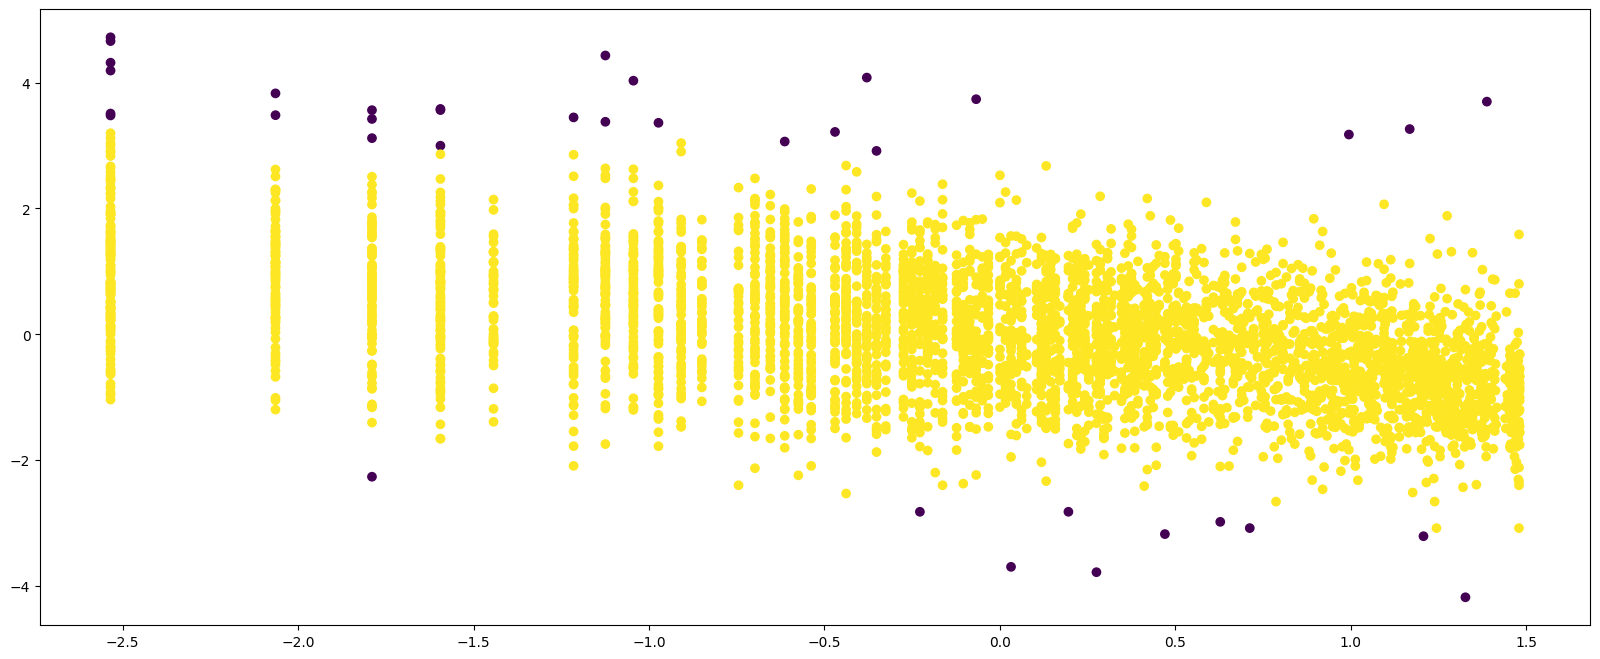

In [ ]:
features = ['Frequency_log','Monetary_log']
x_features = rfm_df[features].values
scaler = preprocessing.StandardScaler()
x_features_scaled = scaler.fit_transform(x_features_ns)
x = x_features_scaled
y_pred = DBSCAN(eps = 0.5, min_samples = 15).fit_predict(x)
plt.figure(figsize=(20,8))
plt.scatter(x[:, 0], x[:, 1], c = y_pred)

**The estimated number of clusters is 2**

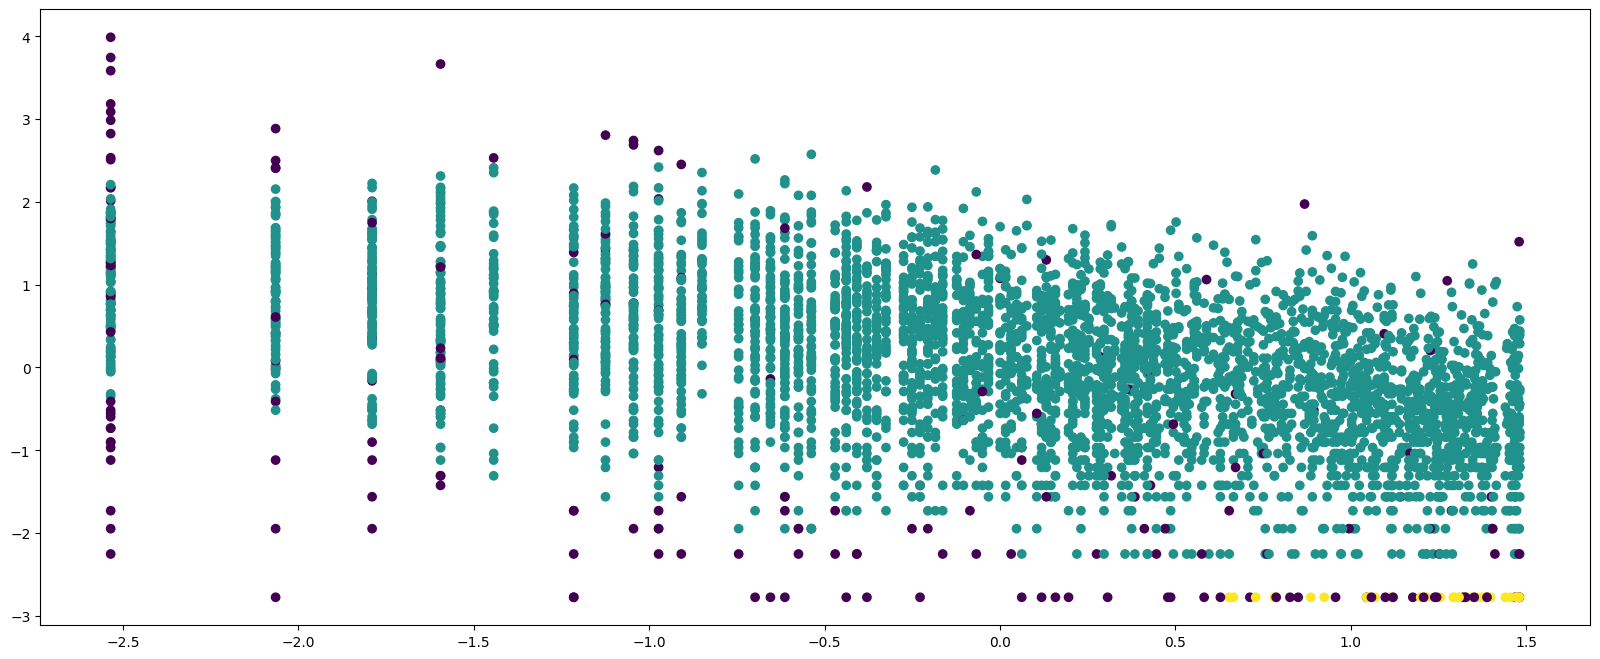

In [ ]:
feature_vector = ['Recency_log', 'Frequency_log', 'Monetary_log']
x_features = rfm_df[feature_vector].values
scaler = preprocessing.StandardScaler()
x = scaler.fit_transform(x_features)
y_pred = DBSCAN(eps = 0.5, min_samples = 15).fit_predict(x)
plt.figure(figsize=(20,8))
plt.scatter(x[:, 0], x[:, 1], c = y_pred)

**We can see that the estimated number of clusters is 2. Black dots indicate the points that are serving as noise.**

### **3) Dendogram Method**

**In Heirarchical Clustering, a dendogram is a tree like diagram that displays the relationships between data points as they are merged into clusters. Choosing the optimal number of clusters in a dendogram involves identifying a point where the merging process provides a meaningful partition of data.**

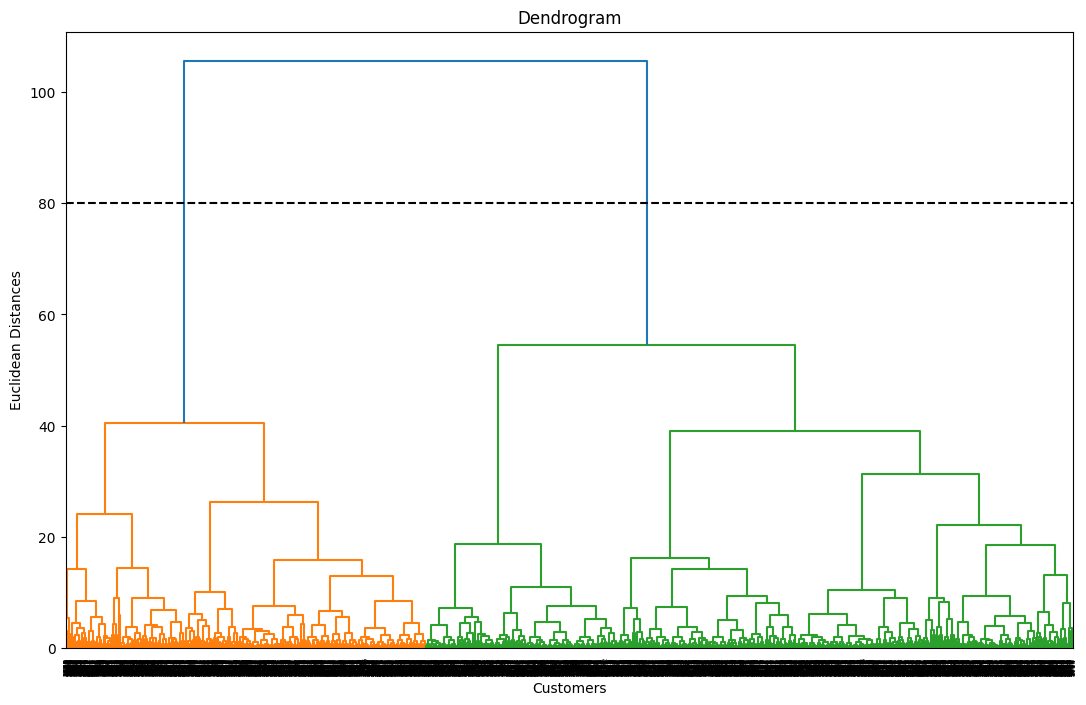

In [ ]:
# We are cutting at a distance of 80 because we have to make a cut where the vertical lines of the
# dendogram are relatively long compared to other levels indicating significant distance between clusters.
plt.figure(figsize = (13,8))
dendrogram = sch.dendrogram(sch.linkage(x, method = 'ward'))
plt.title("Dendrogram")
plt.xlabel("Customers")
plt.ylabel("Euclidean Distances")
plt.axhline(y=80, color='black', linestyle='--')
plt.show()

In [ ]:
# From the above explanation, we will use the 2 as the number of clusters
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(x)

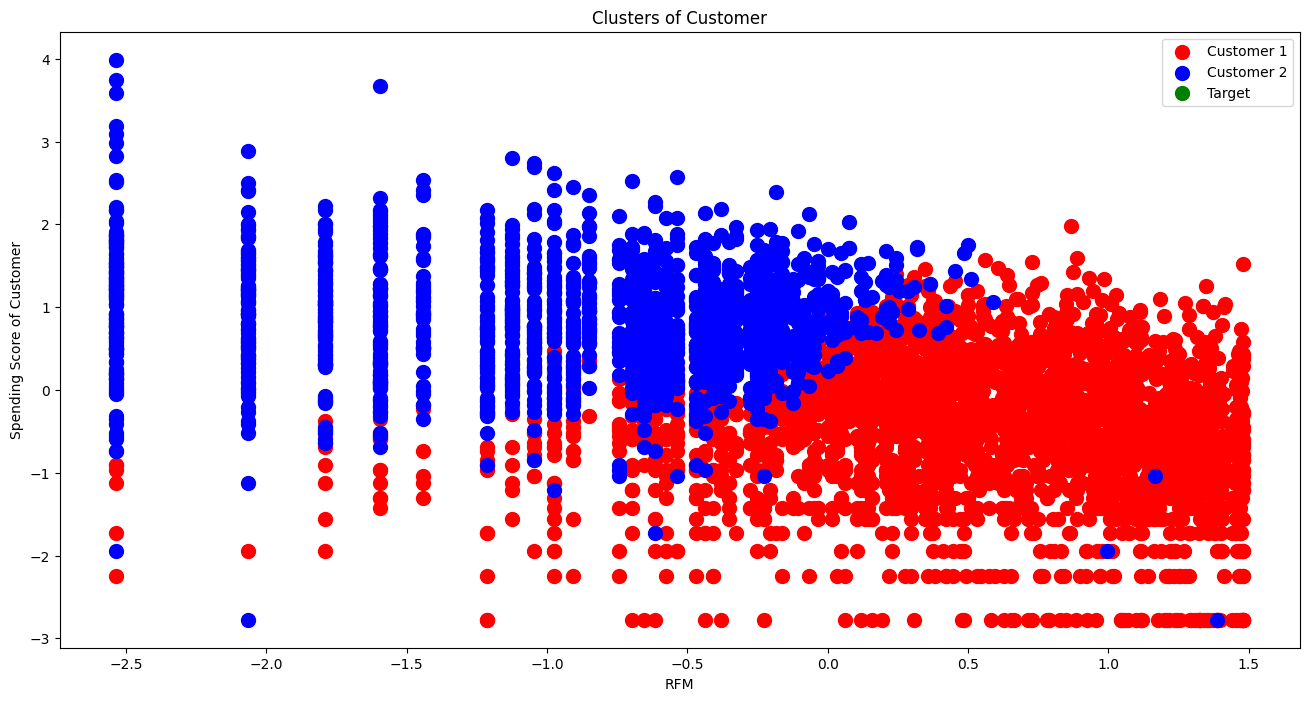

In [ ]:
plt.figure(figsize = (16,8))
plt.scatter(x[y_hc == 0, 0], x[y_hc == 0, 1], s = 100, c= 'red', label = 'Customer 1')
plt.scatter(x[y_hc == 1, 0], x[y_hc == 1, 1], s = 100, c= 'blue', label = 'Customer 2')
plt.scatter(x[y_hc == 2, 0], x[y_hc == 2, 1], s = 100, c= 'green', label = 'Target')
plt.title("Clusters of Customer")
plt.xlabel("RFM")
plt.ylabel("Spending Score of Customer")
plt.legend()
plt.show()

# **Conclusion**

1.   For the first segmentation, we divided the customers into four categories by dividing the sum of their RFM scores in 4 quantiles(quartiles). The categories were :-

*   Bronze:- Customers with very high Recency but very low Frequency and Monetary(Spendings). We have got around 770 customers in this level.

*   Silver:- Customers with High recency and low Frequency and Monetary(Spendings). We have got around 981 customers in this level.

*   Gold:- Customers with average Recency, Frequency and Monetary(Spendings). We got 1324 customers in this level.

*   Platinum:- Customers with low Recency but very high Frequency and Monetary(Spendings). We got 1263 customers in this level.


2.   For the second segmentation, we used Unsupervized Machine Learning techniques to find the estimated number of clusters:-

*   KMeans with Elbow Method:-
    - Applying the method on Recency and Monetary features gave us the optimal number of clusters to be 2.
    - Applying the method on Frequency and Monetary features gave us the optimal number of clusters to be 2
    - Applying the method on Recency, Frequency and Monetary features gave us the optimal number of clusters to be 2

*   Kmeans with Silhouette score method:-
    - Applying the method on Recency and Monetary features gave us the optimal number of clusters to be 2.
    - Applying the method on Frequency and Monetary features gave us the optimal number of clusters to be 2
    - Applying the method on Recency, Frequency and Monetary features gave us the optimal number of clusters to be 2

*   DBSCAN METHOD:-
    - Applying the method on Recency and Monetary features gave us the optimal number of clusters to be 2.
    - Applying the method on Frequency and Monetary features gave us the optimal number of clusters to be 2
    - Applying the method on Recency, Frequency and Monetary features gave us the optimal number of clusters to be 2

*   Heirachical Clustering (Dendogram method):-
    - Applying the method on Recency, Frequency and Monetary features gave us the optimal number of clusters to be 2 and also indicated the noise data points

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***